<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Информация-о-договоре" data-toc-modified-id="Информация-о-договоре-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Информация о договоре</a></span></li><li><span><a href="#Персональные-данные" data-toc-modified-id="Персональные-данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Персональные данные</a></span></li><li><span><a href="#Услуги-интернета" data-toc-modified-id="Услуги-интернета-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Услуги интернета</a></span></li><li><span><a href="#Услуги-телефонии" data-toc-modified-id="Услуги-телефонии-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Услуги телефонии</a></span></li><li><span><a href="#Вопросы" data-toc-modified-id="Вопросы-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вопросы</a></span></li><li><span><a href="#План" data-toc-modified-id="План-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>План</a></span></li></ul></li><li><span><a href="#Первичная-подготовка-данных" data-toc-modified-id="Первичная-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Первичная подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Добавление-признаков-и-объеденение-данных" data-toc-modified-id="Добавление-признаков-и-объеденение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Добавление признаков и объеденение данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Подготовка-данных-для-моделей" data-toc-modified-id="Подготовка-данных-для-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подготовка данных для моделей</a></span></li><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Важность признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Отчет-по-решению" data-toc-modified-id="Отчет-по-решению-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Отчет по решению</a></span></li></ul></div>

# Описание проекта: телекоммуникации

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия.

Оператор предоставляет два основных типа услуг:
- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

# Описание данных

Данные состоят из файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец customerID содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.

# Цель

Необходимо выбрать и обучить модель, которая будет классифицировать клиентов, которые хотят уйти, что со стороны заказчика поможет удерживать клиентскую базу и даст возможность преумножить доход.

# Задачи

1. Загрузка и изучение данных.
- проверить соответствие типам данных
- проверить наличие пропусков и дубликатов
- проверить регистр столбцов
2. Подготовка данных
- определить значащие признаки и составить целевой признак
- соединить таблицы по полю customerID
3. Исследовательский анализ данных.
- построить графики распределения данных
- выявить аномальные значения в данных
4. Предобработка данных
- устранить пропуски и аномалии
- исследовать признаки на корреляцию, в том числе категориальные
- выявить возможный дисбаланс классов
5. Подготовка данных к обучению.
- сплитануть данные на обучающую и тестовую выборки
- закодировать данные и выполнить стандартизацию
6. Обучение модели
- подготовить и обучить модели, подобрав лучшие гиперпараметры с GridSearch
- определить наилучшую модель по метрике AUC-ROC и Accuracy
7. Проверка модели
- протестирвать наилучшую модель на тестовой выборке
- проанализировать матрицу ошибок
8. Анализ важности признаков.
9. Общий вывод

## Изучение данных

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import re

import phik

from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score

RANDOM_STATE = 70823

Необходимо загрузить данные:
- data_contract — информация о договоре
- data_personal — персональные данные клиента
- data_internet — информация об интернет-услугах
- data_phone — информация об услугах телефонии

Информация в столбцах:
- BeginDate – дата начала пользования услугами
- EndDate – дата окончания пользования услугами
- Type – тип оплаты: ежемесячный, годовой и тд.
- PaperlessBilling – электронный платёжный документ
- PaymentMethod – способ оплаты
- MonthlyCharges – ежемесячные траты на услуги по договору
- TotalCharges – всего потрачено денег на услуги
- Dependents – наличие иждивенцев
- Senior Citizen – наличие пенсионного статуса по возрасту
- Partner – наличие супруга(и)
- MultipleLines – наличие возможности ведения параллельных линий во время звонка

In [2]:
try:
    data_contract = pd.read_csv('C:/Users/School252/Downloads/contract_new.csv', 
                                index_col=['customerID'], parse_dates=['BeginDate', 'EndDate'])
    data_personal = pd.read_csv('C:/Users/School252/Downloads/personal_new.csv', index_col=['customerID'])
    data_internet = pd.read_csv('C:/Users/School252/Downloads/internet_new.csv', index_col=['customerID'])
    data_phone = pd.read_csv('C:/Users/School252/Downloads/phone_new.csv', index_col=['customerID'])
except:
    data_contract = pd.read_csv('/datasets/contract_new.csv', index_col=['customerID'])
    data_personal = pd.read_csv('/datasets/personal_new.csv', index_col=['customerID'])
    data_internet = pd.read_csv('/datasets/internet_new.csv', index_col=['customerID'])
    data_phone = pd.read_csv('/datasets/phone_new.csv', index_col=['customerID'])

In [3]:
# Функция для первичного анализа
def analyze_df(df):
    rows_count, columns_count = df.shape
    print('Количество стобцов:', columns_count)
    print('Количество строк:', rows_count)
    display(df.head(5))
    display(df.describe())
    df.info()

### Информация о договоре

In [4]:
analyze_df(data_contract)

Количество стобцов: 7
Количество строк: 7043


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 440.2+ KB


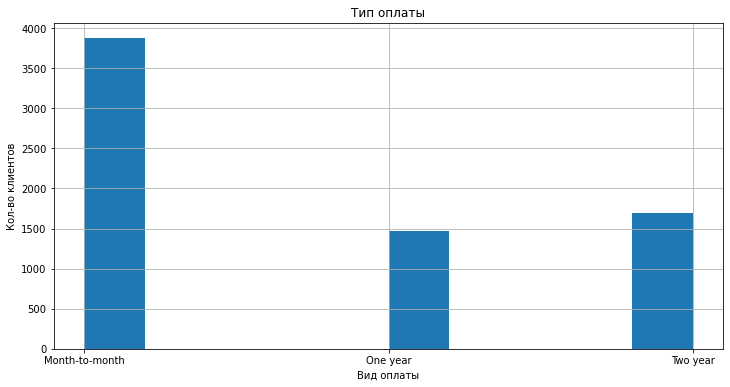

In [5]:
data_contract['Type'].hist(figsize=(12,6))
plt.title('Тип оплаты')
plt.xlabel('Вид оплаты')
plt.ylabel('Кол-во клиентов');

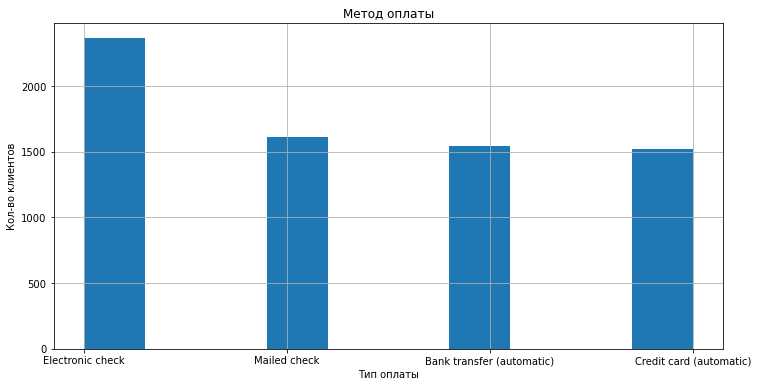

In [6]:
data_contract['PaymentMethod'].hist(figsize=(12,6))
plt.title('Метод оплаты')
plt.xlabel('Тип оплаты')
plt.ylabel('Кол-во клиентов');

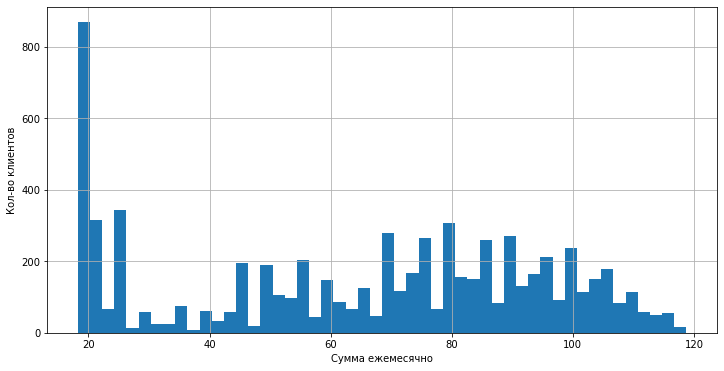

In [7]:
# Взгляним на распределение признака `MonthlyCharges`
data_contract['MonthlyCharges'].hist(bins=50, figsize=(12,6))
plt.xlabel('Сумма ежемесячно')
plt.ylabel('Кол-во клиентов');

Выводы:
- В данных нет пропусков
- Наименования столбцов нужно привести нижнему регистру
- BeginDate и EndDate надо перевести в формат даты
- No в EndDate означает, что пользователь продолжает пользоваться услугами - это целевой признак

### Персональные данные

In [8]:
analyze_df(data_personal)

Количество стобцов: 4
Количество строк: 7043


,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


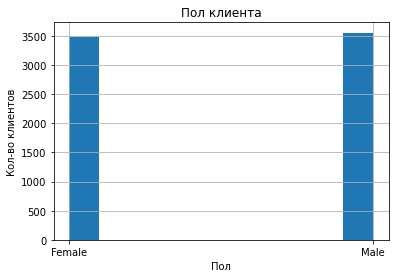

In [9]:
data_personal['gender'].hist()
plt.title('Пол клиента')
plt.xlabel('Пол')
plt.ylabel('Кол-во клиентов');

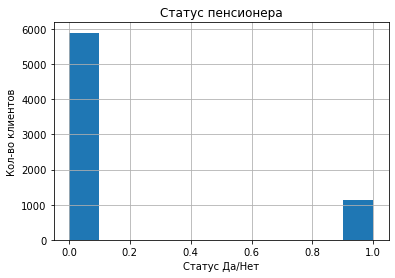

In [10]:
data_personal['SeniorCitizen'].hist()
plt.title('Статус пенсионера')
plt.xlabel('Статус Да/Нет')
plt.ylabel('Кол-во клиентов');

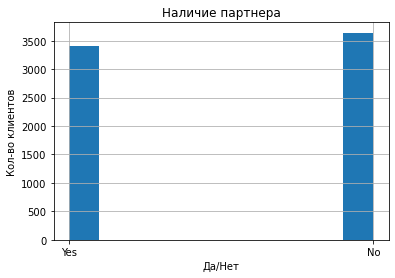

In [11]:
data_personal['Partner'].hist()
plt.title('Наличие партнера')
plt.xlabel('Да/Нет')
plt.ylabel('Кол-во клиентов');

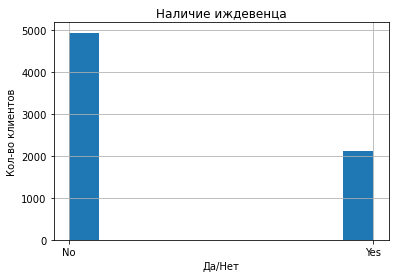

In [12]:
data_personal['Dependents'].hist()
plt.title('Наличие иждевенца')
plt.xlabel('Да/Нет')
plt.ylabel('Кол-во клиентов');

Выводы:
- В данных нет пропусков
- Надо привести к нижнему регистру

### Услуги интернета

In [13]:
analyze_df(data_internet)

Количество стобцов: 7
Количество строк: 5517


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517
unique,2,2,2,2,2,2,2
top,Fiber optic,No,No,No,No,No,No
freq,3096,3498,3088,3095,3473,2810,2785


<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


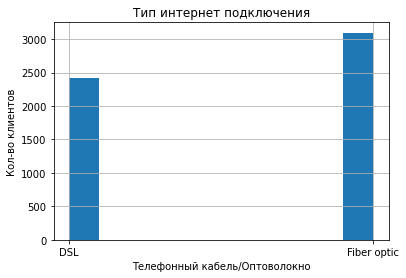

In [14]:
data_internet['InternetService'].hist()
plt.title('Тип интернет подключения')
plt.xlabel('Телефонный кабель/Оптоволокно')
plt.ylabel('Кол-во клиентов');

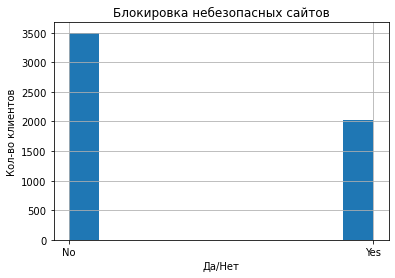

In [15]:
data_internet['OnlineSecurity'].hist()
plt.title('Блокировка небезопасных сайтов')
plt.xlabel('Да/Нет')
plt.ylabel('Кол-во клиентов');

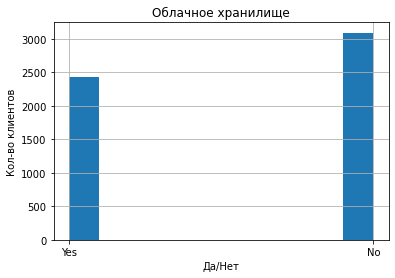

In [16]:
data_internet['OnlineBackup'].hist()
plt.title('Облачное хранилище')
plt.xlabel('Да/Нет')
plt.ylabel('Кол-во клиентов');

Выводы:
- В данных нет пропусков
- Данные есть не по всем клиентам
- Нижний регистр

### Услуги телефонии

In [17]:
analyze_df(data_phone)

Количество стобцов: 1
Количество строк: 6361


,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes


,MultipleLines
count,6361
unique,2
top,No
freq,3390


<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


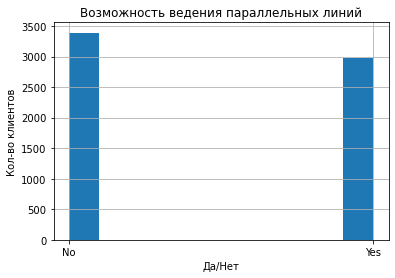

In [18]:
data_phone['MultipleLines'].hist()
plt.title('Возможность ведения параллельных линий')
plt.xlabel('Да/Нет')
plt.ylabel('Кол-во клиентов');

Выводы:
- В данных нет пропусков
- Данные есть не по всем клиентам
- Нижний регистр

### Вопросы

1. Можно ли ко всем категориальным значениям применить One Hot Encoding, поскольку категорий мало?
2. Можно ли удалять какие-то признаки если будет высокая мультиколинеарность?

### План

- Изучить данные в файлах - проверить типы, есть ли пропуски, надо ли преобразовывать данные
- Подготовить данных на основе выводов, полученных на предыдущем шаге
- Провести исследовательский анализ данных - вузализация данных, избавление от выбросов
- Перебор моделей и подбор их параметров
- Вывод по итогам работы

## Первичная подготовка данных

In [19]:
# Приведу к нижнему регистру
def low_col(column_el):
    return str.lower('_'.join(re.sub(r"([A-Z])", r" \1", column_el).split()))

In [20]:
data_contract.columns = map(low_col, data_contract.columns)
data_internet.columns = map(low_col, data_internet.columns)
data_phone.columns = map(low_col, data_phone.columns)
data_personal.columns = map(low_col, data_personal.columns)

Добавлю целевой признак Churn, который будет означать отказался клиент от услуг или нет.
Если значение в столбце EndDate равно "No", то значит клиент не ушел и целевой признак равен 0.
Если дата ухода есть, то целевой признак равен 1.

In [21]:
data_contract.total_charges = pd.to_numeric(data_contract.total_charges, errors = 'coerce')

In [22]:
data_contract['churn'] = (data_contract['end_date'] != 'No').astype(int)

Перобразую тип данных у признаков EndDate, MonthlyCharges, TotalCharges

In [23]:
data_contract['monthly_charges'] = data_contract['monthly_charges'].astype(float)

data_contract['end_date'] = data_contract['end_date'].where(data_contract['end_date'] != 'No', '2020-02-01')
data_contract['end_date'] = pd.to_datetime(data_contract['end_date'])
data_contract['begin_date'] = pd.to_datetime(data_contract['begin_date'])

### Добавление признаков и объеденение данных

Выделю признак, какой период (в днях) пользователь пользовался услугами заказчика на момент 2020-02-01.

In [24]:
data_contract['total_days'] = (data_contract['end_date'] - data_contract['begin_date']).dt.days

In [25]:
data_contract['total_charges'] = data_contract['total_charges'].fillna(0)

In [26]:
data_all = data_contract \
    .merge(data_personal, how='left', on='customerID') \
    .merge(data_internet, how='left', on='customerID') \
    .merge(data_phone, how='left', on='customerID') 

In [27]:
data_all

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,total_days,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.20,0,730,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.40,0,2191,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.60,0,337,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN


Пропуски в InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies и MultipleLines скорее всего означают, что услуги не подключены. Заменим пропуски на "NotUsed"

In [28]:
data_all = data_all.fillna('NotUsed')

In [29]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7043 non-null   float64       
 7   churn              7043 non-null   int32         
 8   total_days         7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14

### Исследовательский анализ данных

In [30]:
numeric_columns = ['monthly_charges', 'total_charges', 'total_days']
categorial_columns = [
    'type',
    'paperless_billing',
    'payment_method',
    'gender',
    'senior_citizen',
    'partner',
    'dependents',
    'internet_service', 
    'online_security', 
    'online_backup', 
    'device_protection', 
    'tech_support', 
    'streaming_t_v', 
    'streaming_movies', 
    'multiple_lines',
]

Изучу распределение категорильных признаков относительно целевого признака

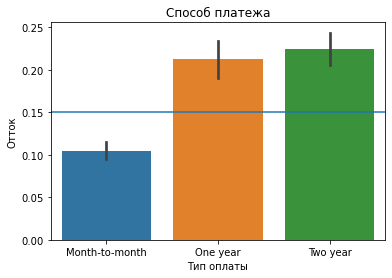

In [31]:
sns.barplot(data=data_all, x="type", y="churn")
plt.title('Способ платежа')
plt.xlabel('Тип оплаты')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще клиенты уходят, когда платят за 1 или 2 года

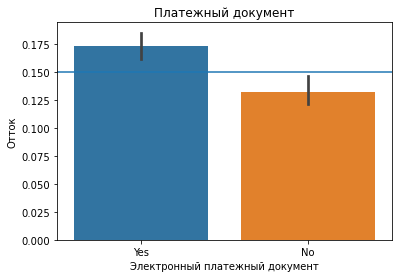

In [32]:
sns.barplot(data=data_all, x="paperless_billing", y="churn")
plt.title('Платежный документ')
plt.xlabel('Электронный платежный документ')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще уходят с использованием электронного платёжного документа

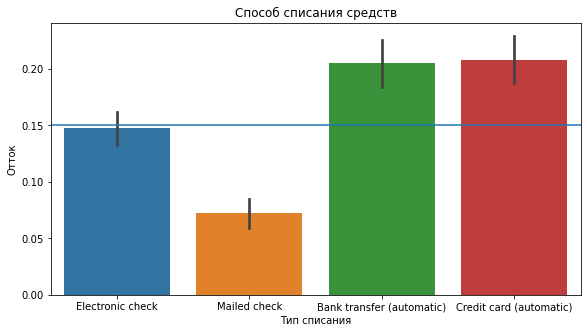

In [33]:
fig = plt.subplots(figsize=(9.5, 5))
sns.barplot(data=data_all, x="payment_method", y="churn")
plt.title('Способ списания средств')
plt.xlabel('Тип списания')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще всего у ушедших клиентов оплата списывалась автоматически

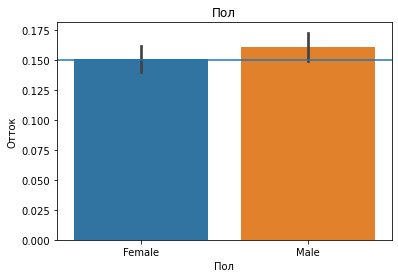

In [34]:
sns.barplot(data=data_all, x="gender", y="churn")
plt.title('Пол')
plt.xlabel('Пол')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Распределение приблизительно одинаковое, чуть больше мужчин

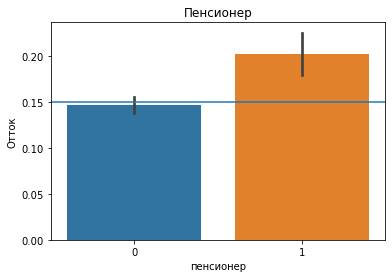

In [35]:
sns.barplot(data=data_all, x="senior_citizen", y="churn")
plt.title('Пенсионер')
plt.xlabel('пенсионер')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Больше всего ушедших не пенсионного возраста

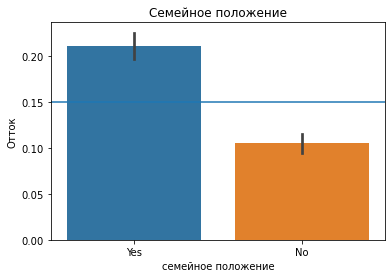

In [36]:
sns.barplot(data=data_all, x="partner", y="churn")
plt.title('Семейное положение')
plt.xlabel('семейное положение')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще всего уходили клиенты женатые/замужем

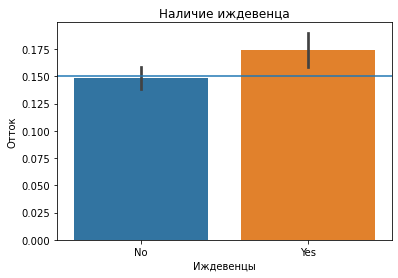

In [37]:
sns.barplot(data=data_all, x="dependents", y="churn")
plt.title('Наличие иждевенца')
plt.xlabel('Иждевенцы')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще у ушедших клиентов есть иждевенец

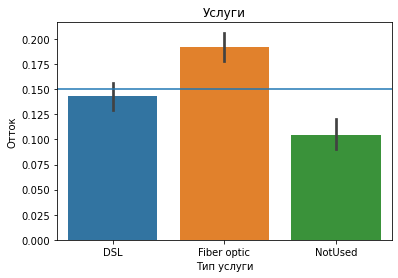

In [38]:
sns.barplot(data=data_all, x="internet_service", y="churn")
plt.title('Услуги')
plt.xlabel('Тип услуги')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще всего у ушедшего клиента был подкючен интернет по оптическому кабелю 

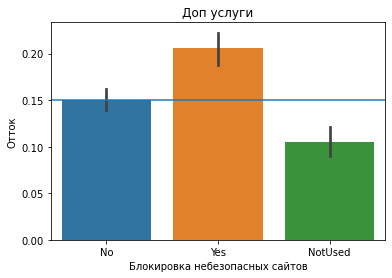

In [39]:
sns.barplot(data=data_all, x="online_security", y="churn")
plt.title('Доп услуги')
plt.xlabel('Блокировка небезопасных сайтов')
plt.ylabel('Отток')
plt.axhline(y=0.15);

У большинства ушедших клиентов не была подключена блокировка небезопасных сайтов

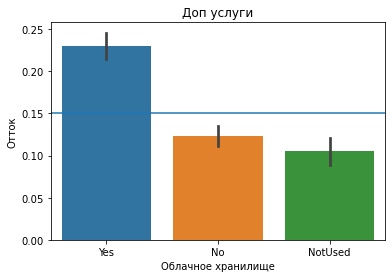

In [40]:
sns.barplot(data=data_all, x="online_backup", y="churn")
plt.title('Доп услуги')
plt.xlabel('Облачное хранилище')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще у ушедших клиентов было подключено облачное хранилище

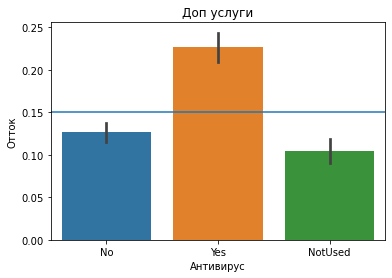

In [41]:
sns.barplot(data=data_all, x="device_protection", y="churn")
plt.title('Доп услуги')
plt.xlabel('Антивирус')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще у ушедших клиентов был подключен антивирус

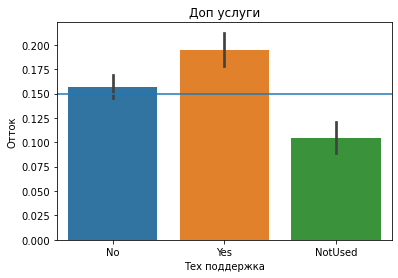

In [42]:
sns.barplot(data=data_all, x="tech_support", y="churn")
plt.title('Доп услуги')
plt.xlabel('Тех поддержка')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще у ушедших клинтов не была подключена выделенная линия тех. поддержки

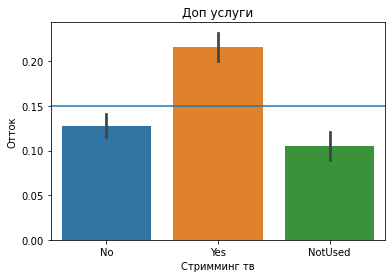

In [43]:
sns.barplot(data=data_all, x="streaming_t_v", y="churn")
plt.title('Доп услуги')
plt.xlabel('Стримминг тв')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще было подключено стримминговое тв

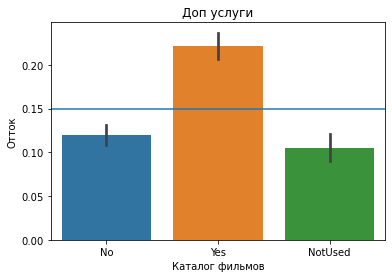

In [44]:
sns.barplot(data=data_all, x="streaming_movies", y="churn")
plt.title('Доп услуги')
plt.xlabel('Каталог фильмов')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще был подключен каталог фильмов

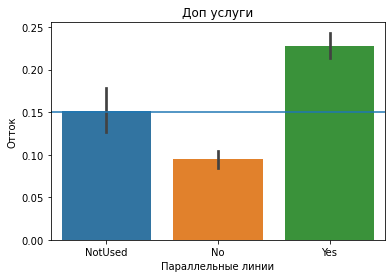

In [45]:
sns.barplot(data=data_all, x="multiple_lines", y="churn")
plt.title('Доп услуги')
plt.xlabel('Параллельные линии')
plt.ylabel('Отток')
plt.axhline(y=0.15);

Чаще всего была возможность ведения параллельных линий

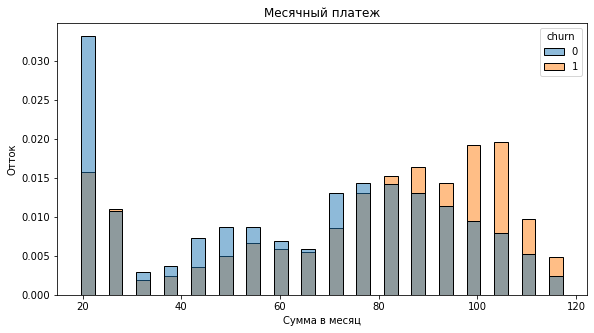

In [46]:
fig = plt.subplots(figsize=(9.5, 5))
sns.histplot(data=data_all, x="monthly_charges", hue="churn", stat='density', common_norm=False, bins='auto', shrink=0.5)
plt.title('Месячный платеж')
plt.xlabel('Сумма в месяц')
plt.ylabel('Отток');

Чем выше плата за месяц тем больше клиентов уходило

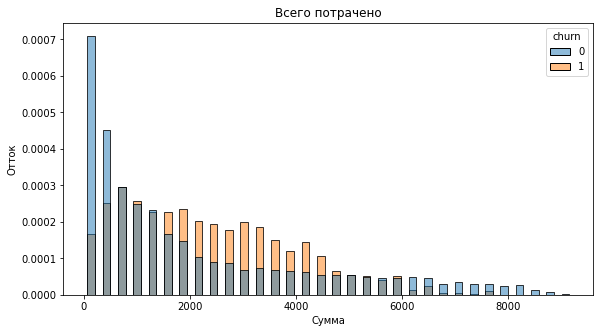

In [47]:
fig = plt.subplots(figsize=(9.5, 5))
sns.histplot(data=data_all, x="total_charges", hue="churn", stat='density', common_norm=False, bins='auto', shrink=0.5)
plt.title('Всего потрачено')
plt.xlabel('Сумма')
plt.ylabel('Отток');

Чаще всего ушедшие клиенты уходили не потратив много денег

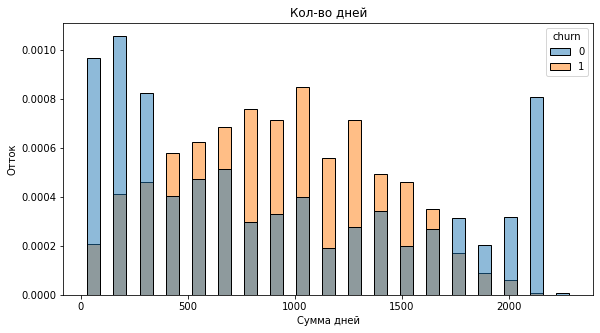

In [48]:
fig = plt.subplots(figsize=(9.5, 5))
sns.histplot(data=data_all, x="total_days", hue="churn", stat='density', common_norm=False, bins='auto', shrink=0.5)
plt.title('Кол-во дней')
plt.xlabel('Сумма дней')
plt.ylabel('Отток');

Чаще всего клиенты уходили через 2-3 года

In [49]:
data_all.loc[data_all["senior_citizen"] == 0, "senior_citizen"] = 'No'

In [50]:
data_all.loc[data_all["senior_citizen"] == 1, "senior_citizen"] = 'Yes'

In [51]:
data_all

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,total_days,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,NotUsed
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,NotUsed
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,2035.20,0,730,Male,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7430.40,0,2191,Female,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,325.60,0,337,Female,No,Yes,Yes,DSL,Yes,No,No,No,No,No,NotUsed


In [52]:
agg_func_tromb = {'monthly_charges' : 'mean', 'total_charges' : 'mean', 'total_days' : 'mean', 
                  'type' : pd.Series.mode, 'paperless_billing' : pd.Series.mode,'payment_method' : pd.Series.mode,
                  'gender' : pd.Series.mode, 'senior_citizen' : pd.Series.mode,'partner' : pd.Series.mode,
                  'dependents' : pd.Series.mode, 'internet_service' : pd.Series.mode, 'online_security' : pd.Series.mode,
                  'online_backup' : pd.Series.mode, 'device_protection' : pd.Series.mode, 'tech_support' : pd.Series.mode, 
                   'streaming_t_v' : pd.Series.mode, 'streaming_movies' : pd.Series.mode, 'multiple_lines' : pd.Series.mode}

In [53]:
pivot = pd.pivot_table(data_all,
               columns="churn",
               aggfunc= agg_func_tromb)

In [54]:
pivot['difference'] = 'неприменимо'

In [55]:
pivot['difference'][4] = pivot[0][4] - pivot[1][4]
pivot['difference'][15] = pivot[0][15] - pivot[1][15]
pivot['difference'][16] = pivot[0][16] - pivot[1][16]

In [56]:
pivot

churn,0,1,difference
dependents,No,No,неприменимо
device_protection,No,Yes,неприменимо
gender,Male,Male,неприменимо
internet_service,Fiber optic,Fiber optic,неприменимо
monthly_charges,62.763455,75.546004,-12.782549
multiple_lines,No,Yes,неприменимо
online_backup,No,Yes,неприменимо
online_security,No,No,неприменимо
paperless_billing,Yes,Yes,неприменимо
partner,No,Yes,неприменимо


Вывод: Таким образом, примерный портрет ушедшего клиента выглядит следующим образом.
Это мужчина/женщина у которого нет иждевенцев, оплата снимается автоматически и скорее всего сразу за большой срок.
Из услуг он пользуется стриммингом, кинотеатром, антивирус и облачное хранилище. Из-за этого цена была выше чем за простое предоставление услуг

Рассмотрю матрицу корреляции

In [57]:
data_cor = data_all.drop(['begin_date', 'end_date'], axis=1)

In [58]:
interval_columns = ['monthly_charges',
                    'total_charges',
                    'total_days']

corr = data_cor.phik_matrix(interval_cols = interval_columns)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .format(precision=2))

,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,total_days,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines
type,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
paperless_billing,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
payment_method,0.28,0.37,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
monthly_charges,0.39,0.47,0.40,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
total_charges,0.47,0.20,0.34,0.71,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
churn,0.09,0.08,0.21,0.23,0.30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
total_days,0.63,0.03,0.35,0.39,0.85,0.37,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gender,0.00,0.00,0.00,0.01,0.00,0.01,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
senior_citizen,0.09,0.24,0.29,0.30,0.14,0.09,0.06,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
partner,0.18,0.01,0.24,0.20,0.38,0.23,0.45,0.00,0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


- чем дольше клиент пользовался услугами, тем меньше вероятность, что он уйдет
- чем выше цена за услуги в месяц, тем больше вероятность, что клиент уйдет

- столбцы internet_service, streaming_t_v, streaming_movies сильно коррелируют с признаком monthly_charges, поэтому их необходимо удалить
- столбец total_charges сильно коррелирует со столбцом total_days, поэтому удалим столбец total_charges

Удалим ненужные для обучения столбцы BeginDate и EndDate и TotalCharges

In [59]:
data_all = data_all.drop(['begin_date', 
                          'end_date', 
                          'total_charges', 
                          'internet_service',
                          'streaming_t_v',
                          'streaming_movies'], axis = 1)

Проверим целевой признак на дисбаланс классов

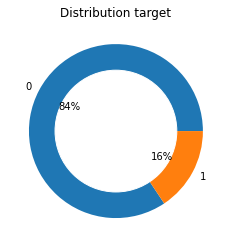

In [60]:
plt.pie(data_all.churn.value_counts(), labels = ['0', '1'], autopct='%1.0f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution target')

plt.show()

Дисбаланс классов присутствует.

Вывод:

- устранены пропуски и аномалии
- проведено исследование признаков на мултколлениарность, что позволило избавиться от лишних столбцов
- выявлен дисбаланс классов, поэтому будем использовать метрику качества AUC-ROC, которая нечувствительна к дисбалансу

### Подготовка данных для моделей

In [61]:
features = data_all.drop(['churn'], axis=1)
target = data_all['churn']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.25, 
                                                                            random_state=RANDOM_STATE, 
                                                                            stratify=target
                                                                           )

In [62]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   churn              7043 non-null   int32  
 5   total_days         7043 non-null   int64  
 6   gender             7043 non-null   object 
 7   senior_citizen     7043 non-null   object 
 8   partner            7043 non-null   object 
 9   dependents         7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  multiple_lines     7043 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(12)
memory usage: 1.

In [63]:
features_train.senior_citizen = features_train.senior_citizen.astype('object')

ohe_features = features_train.select_dtypes(include='object').columns.to_list()
num_features = features_train.select_dtypes(exclude='object').columns.to_list()


In [64]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),  # количественные признаки
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), ohe_features)  # категориальные признаки
    ])

pipeline = Pipeline([
    ('scaler', preprocessor),
    ('model', None)
]
)


param_grid = [
    {
        'model': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')],
        'model__C': np.logspace(-3,3,20),
        'model__penalty': ["l1", "l2"]
    },
]

In [65]:
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),  # количественные признаки
        ('cat_oe', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan), ohe_features) # категориальные признаки
    ])

pipeline_tree = Pipeline([
    ('scaler', preprocessor_tree),
    ('model', None)
]
)


param_grid_tree = [
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__criterion': ['gini','entropy'],
        'model__max_depth': range(1, 6)
    },
    {
        'model': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'model__n_estimators': range(10, 101, 30),
        'model__max_depth': range(1, 6)
    }
]

In [66]:
def get_results(model, name):
    print(f''
          f'Модель {name}:\n' \
           f'Параметры: {model.best_params_}\n' \
           f'ROC-AUC: {model.best_score_}')

In [67]:
interaction_only=True

In [68]:
grid_pipe = GridSearchCV(pipeline,
                         param_grid,
                         cv = 3,
                         scoring='roc_auc',
                         n_jobs=-1,
                         verbose= False)
grid_pipe.fit(features_train, target_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['monthly_charges',
                                                                          'total_days']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['type',
                                                                          'paperless_billing',
                                                                          'payment_method',
              

In [69]:
get_results(grid_pipe, 'LogisticRegression')

Модель LogisticRegression:
Параметры: {'model': LogisticRegression(C=1000.0, random_state=70823, solver='liblinear'), 'model__C': 1000.0, 'model__penalty': 'l2'}
ROC-AUC: 0.7523537783879402


In [70]:
grid_pipe = GridSearchCV(pipeline_tree,
                         param_grid_tree,
                         cv = 3,
                         scoring='roc_auc',
                         n_jobs=-1,
                         verbose= False)
grid_pipe.fit(features_train, target_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['monthly_charges',
                                                                          'total_days']),
                                                                        ('cat_oe',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=nan),
                                                                         ['type',
                                                                          'paperless_billing',
                                                                          'payment_me

In [71]:
get_results(grid_pipe, 'RandomForestClassifier')

Модель RandomForestClassifier:
Параметры: {'model': RandomForestClassifier(max_depth=5, random_state=70823), 'model__max_depth': 5, 'model__n_estimators': 100}
ROC-AUC: 0.8210499422856573


In [72]:
category_features = ohe_features
number_features = num_features

In [73]:
scaler = StandardScaler()
scaler.fit(features_train[number_features])
features_train[number_features] = scaler.transform(features_train[number_features])
features_test[number_features] = scaler.transform(features_test[number_features])

features_train.head()

,type,paperless_billing,payment_method,monthly_charges,total_days,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,multiple_lines
customerID,,,,,,,,,,,,,,
7771-CFQRQ,Two year,No,Bank transfer (automatic),-0.019039,0.780975,Female,No,Yes,Yes,No,Yes,No,Yes,No
3011-WQKSZ,Month-to-month,Yes,Electronic check,-1.467466,-0.463170,Male,No,No,Yes,NotUsed,NotUsed,NotUsed,NotUsed,No
7488-MXJIV,Month-to-month,Yes,Electronic check,0.703521,-0.952359,Female,No,No,No,No,No,No,No,Yes
4958-XCBDQ,Month-to-month,Yes,Electronic check,1.224359,0.423210,Male,Yes,No,No,No,No,Yes,No,Yes
9978-HYCIN,One year,Yes,Bank transfer (automatic),0.680372,0.780975,Male,Yes,Yes,Yes,No,Yes,No,No,No


In [74]:
cbc = CatBoostClassifier(silent=False, 
                         random_seed=RANDOM_STATE, 
                         cat_features=category_features)
cbc_params = {'learning_rate': [0.01, 0.03], 'depth': (1, 5)}

grid_cbc = GridSearchCV(cbc, cbc_params, 
                        cv=3, scoring='roc_auc'
                       )
grid_cbc.fit(features_train, target_train);

grid_cbc.best_params_

0:	learn: 0.6872981	total: 184ms	remaining: 3m 4s
1:	learn: 0.6800015	total: 198ms	remaining: 1m 38s
2:	learn: 0.6741581	total: 205ms	remaining: 1m 7s
3:	learn: 0.6684554	total: 216ms	remaining: 53.9s
4:	learn: 0.6624479	total: 228ms	remaining: 45.4s
5:	learn: 0.6570351	total: 242ms	remaining: 40s
6:	learn: 0.6519888	total: 253ms	remaining: 35.9s
7:	learn: 0.6469225	total: 265ms	remaining: 32.8s
8:	learn: 0.6418506	total: 276ms	remaining: 30.4s
9:	learn: 0.6368753	total: 288ms	remaining: 28.5s
10:	learn: 0.6314367	total: 299ms	remaining: 26.9s
11:	learn: 0.6269628	total: 306ms	remaining: 25.2s
12:	learn: 0.6226174	total: 317ms	remaining: 24.1s
13:	learn: 0.6177208	total: 328ms	remaining: 23.1s
14:	learn: 0.6131771	total: 340ms	remaining: 22.3s
15:	learn: 0.6090537	total: 352ms	remaining: 21.6s
16:	learn: 0.6050694	total: 363ms	remaining: 21s
17:	learn: 0.6010204	total: 377ms	remaining: 20.6s
18:	learn: 0.5968587	total: 392ms	remaining: 20.2s
19:	learn: 0.5931222	total: 409ms	remaining:

164:	learn: 0.4062061	total: 2.37s	remaining: 12s
165:	learn: 0.4059950	total: 2.38s	remaining: 12s
166:	learn: 0.4057174	total: 2.4s	remaining: 11.9s
167:	learn: 0.4054685	total: 2.41s	remaining: 11.9s
168:	learn: 0.4050051	total: 2.42s	remaining: 11.9s
169:	learn: 0.4046626	total: 2.44s	remaining: 11.9s
170:	learn: 0.4044250	total: 2.46s	remaining: 11.9s
171:	learn: 0.4041697	total: 2.47s	remaining: 11.9s
172:	learn: 0.4039020	total: 2.48s	remaining: 11.9s
173:	learn: 0.4036791	total: 2.5s	remaining: 11.8s
174:	learn: 0.4032378	total: 2.51s	remaining: 11.8s
175:	learn: 0.4029955	total: 2.52s	remaining: 11.8s
176:	learn: 0.4027586	total: 2.53s	remaining: 11.8s
177:	learn: 0.4025482	total: 2.54s	remaining: 11.8s
178:	learn: 0.4023795	total: 2.56s	remaining: 11.7s
179:	learn: 0.4020723	total: 2.57s	remaining: 11.7s
180:	learn: 0.4018363	total: 2.58s	remaining: 11.7s
181:	learn: 0.4016380	total: 2.6s	remaining: 11.7s
182:	learn: 0.4014440	total: 2.61s	remaining: 11.6s
183:	learn: 0.40122

330:	learn: 0.3766622	total: 4.55s	remaining: 9.2s
331:	learn: 0.3764945	total: 4.57s	remaining: 9.19s
332:	learn: 0.3764272	total: 4.58s	remaining: 9.17s
333:	learn: 0.3763422	total: 4.59s	remaining: 9.16s
334:	learn: 0.3762530	total: 4.61s	remaining: 9.14s
335:	learn: 0.3761808	total: 4.63s	remaining: 9.14s
336:	learn: 0.3760992	total: 4.64s	remaining: 9.13s
337:	learn: 0.3760350	total: 4.65s	remaining: 9.11s
338:	learn: 0.3758408	total: 4.67s	remaining: 9.1s
339:	learn: 0.3757605	total: 4.68s	remaining: 9.08s
340:	learn: 0.3756730	total: 4.69s	remaining: 9.07s
341:	learn: 0.3755873	total: 4.71s	remaining: 9.05s
342:	learn: 0.3755104	total: 4.72s	remaining: 9.04s
343:	learn: 0.3754280	total: 4.73s	remaining: 9.03s
344:	learn: 0.3752258	total: 4.75s	remaining: 9.01s
345:	learn: 0.3751744	total: 4.76s	remaining: 9s
346:	learn: 0.3751210	total: 4.78s	remaining: 8.99s
347:	learn: 0.3750395	total: 4.79s	remaining: 8.97s
348:	learn: 0.3748298	total: 4.8s	remaining: 8.96s
349:	learn: 0.3747

491:	learn: 0.3643841	total: 6.72s	remaining: 6.94s
492:	learn: 0.3643007	total: 6.74s	remaining: 6.93s
493:	learn: 0.3642597	total: 6.75s	remaining: 6.91s
494:	learn: 0.3642208	total: 6.76s	remaining: 6.9s
495:	learn: 0.3641304	total: 6.77s	remaining: 6.88s
496:	learn: 0.3640991	total: 6.79s	remaining: 6.87s
497:	learn: 0.3640557	total: 6.8s	remaining: 6.85s
498:	learn: 0.3640178	total: 6.81s	remaining: 6.84s
499:	learn: 0.3639828	total: 6.82s	remaining: 6.82s
500:	learn: 0.3638476	total: 6.83s	remaining: 6.81s
501:	learn: 0.3637085	total: 6.85s	remaining: 6.79s
502:	learn: 0.3636572	total: 6.86s	remaining: 6.78s
503:	learn: 0.3636162	total: 6.87s	remaining: 6.76s
504:	learn: 0.3635849	total: 6.89s	remaining: 6.75s
505:	learn: 0.3635585	total: 6.9s	remaining: 6.74s
506:	learn: 0.3635071	total: 6.91s	remaining: 6.72s
507:	learn: 0.3634804	total: 6.93s	remaining: 6.71s
508:	learn: 0.3634231	total: 6.94s	remaining: 6.7s
509:	learn: 0.3633263	total: 6.95s	remaining: 6.68s
510:	learn: 0.36

654:	learn: 0.3553926	total: 8.91s	remaining: 4.7s
655:	learn: 0.3553719	total: 8.93s	remaining: 4.68s
656:	learn: 0.3553420	total: 8.94s	remaining: 4.67s
657:	learn: 0.3553072	total: 8.95s	remaining: 4.65s
658:	learn: 0.3552633	total: 8.97s	remaining: 4.64s
659:	learn: 0.3552402	total: 8.98s	remaining: 4.63s
660:	learn: 0.3552146	total: 8.99s	remaining: 4.61s
661:	learn: 0.3551756	total: 9s	remaining: 4.6s
662:	learn: 0.3551551	total: 9.02s	remaining: 4.58s
663:	learn: 0.3551376	total: 9.03s	remaining: 4.57s
664:	learn: 0.3551148	total: 9.04s	remaining: 4.55s
665:	learn: 0.3550767	total: 9.05s	remaining: 4.54s
666:	learn: 0.3550595	total: 9.06s	remaining: 4.53s
667:	learn: 0.3550260	total: 9.08s	remaining: 4.51s
668:	learn: 0.3549768	total: 9.09s	remaining: 4.5s
669:	learn: 0.3549485	total: 9.1s	remaining: 4.48s
670:	learn: 0.3549268	total: 9.12s	remaining: 4.47s
671:	learn: 0.3549026	total: 9.13s	remaining: 4.46s
672:	learn: 0.3548797	total: 9.14s	remaining: 4.44s
673:	learn: 0.35484

827:	learn: 0.3490934	total: 11.3s	remaining: 2.34s
828:	learn: 0.3490532	total: 11.3s	remaining: 2.33s
829:	learn: 0.3490241	total: 11.3s	remaining: 2.31s
830:	learn: 0.3489311	total: 11.3s	remaining: 2.3s
831:	learn: 0.3489054	total: 11.3s	remaining: 2.29s
832:	learn: 0.3488855	total: 11.3s	remaining: 2.27s
833:	learn: 0.3488570	total: 11.4s	remaining: 2.26s
834:	learn: 0.3488178	total: 11.4s	remaining: 2.25s
835:	learn: 0.3488047	total: 11.4s	remaining: 2.23s
836:	learn: 0.3487782	total: 11.4s	remaining: 2.22s
837:	learn: 0.3487672	total: 11.4s	remaining: 2.21s
838:	learn: 0.3487523	total: 11.4s	remaining: 2.19s
839:	learn: 0.3487517	total: 11.4s	remaining: 2.18s
840:	learn: 0.3487265	total: 11.5s	remaining: 2.17s
841:	learn: 0.3487019	total: 11.5s	remaining: 2.15s
842:	learn: 0.3486533	total: 11.5s	remaining: 2.14s
843:	learn: 0.3486370	total: 11.5s	remaining: 2.12s
844:	learn: 0.3486168	total: 11.5s	remaining: 2.11s
845:	learn: 0.3485772	total: 11.5s	remaining: 2.1s
846:	learn: 0.

991:	learn: 0.3440768	total: 13.4s	remaining: 108ms
992:	learn: 0.3440556	total: 13.5s	remaining: 94.9ms
993:	learn: 0.3440280	total: 13.5s	remaining: 81.3ms
994:	learn: 0.3440071	total: 13.5s	remaining: 67.7ms
995:	learn: 0.3439986	total: 13.5s	remaining: 54.2ms
996:	learn: 0.3439724	total: 13.5s	remaining: 40.6ms
997:	learn: 0.3439721	total: 13.5s	remaining: 27.1ms
998:	learn: 0.3439335	total: 13.5s	remaining: 13.5ms
999:	learn: 0.3439095	total: 13.5s	remaining: 0us
0:	learn: 0.6873318	total: 10ms	remaining: 10s
1:	learn: 0.6816930	total: 18.1ms	remaining: 9.04s
2:	learn: 0.6756405	total: 31.1ms	remaining: 10.3s
3:	learn: 0.6698630	total: 43.7ms	remaining: 10.9s
4:	learn: 0.6645467	total: 51.5ms	remaining: 10.2s
5:	learn: 0.6589661	total: 64.2ms	remaining: 10.6s
6:	learn: 0.6535524	total: 76.1ms	remaining: 10.8s
7:	learn: 0.6483253	total: 90.8ms	remaining: 11.3s
8:	learn: 0.6430773	total: 106ms	remaining: 11.6s
9:	learn: 0.6383494	total: 118ms	remaining: 11.7s
10:	learn: 0.6327366	to

162:	learn: 0.4035379	total: 2.35s	remaining: 12.1s
163:	learn: 0.4032538	total: 2.37s	remaining: 12.1s
164:	learn: 0.4029795	total: 2.4s	remaining: 12.1s
165:	learn: 0.4027270	total: 2.42s	remaining: 12.1s
166:	learn: 0.4024978	total: 2.43s	remaining: 12.1s
167:	learn: 0.4022925	total: 2.45s	remaining: 12.1s
168:	learn: 0.4019979	total: 2.46s	remaining: 12.1s
169:	learn: 0.4017098	total: 2.48s	remaining: 12.1s
170:	learn: 0.4014702	total: 2.5s	remaining: 12.1s
171:	learn: 0.4011909	total: 2.51s	remaining: 12.1s
172:	learn: 0.4006585	total: 2.53s	remaining: 12.1s
173:	learn: 0.4003857	total: 2.55s	remaining: 12.1s
174:	learn: 0.3999666	total: 2.56s	remaining: 12.1s
175:	learn: 0.3997287	total: 2.58s	remaining: 12.1s
176:	learn: 0.3995451	total: 2.6s	remaining: 12.1s
177:	learn: 0.3992823	total: 2.61s	remaining: 12.1s
178:	learn: 0.3990230	total: 2.63s	remaining: 12.1s
179:	learn: 0.3985813	total: 2.65s	remaining: 12.1s
180:	learn: 0.3983706	total: 2.66s	remaining: 12s
181:	learn: 0.398

330:	learn: 0.3726132	total: 4.68s	remaining: 9.45s
331:	learn: 0.3723892	total: 4.69s	remaining: 9.44s
332:	learn: 0.3723054	total: 4.71s	remaining: 9.43s
333:	learn: 0.3721468	total: 4.72s	remaining: 9.42s
334:	learn: 0.3720525	total: 4.74s	remaining: 9.4s
335:	learn: 0.3719668	total: 4.75s	remaining: 9.39s
336:	learn: 0.3718740	total: 4.76s	remaining: 9.37s
337:	learn: 0.3718108	total: 4.78s	remaining: 9.36s
338:	learn: 0.3717210	total: 4.79s	remaining: 9.35s
339:	learn: 0.3716415	total: 4.81s	remaining: 9.33s
340:	learn: 0.3715761	total: 4.82s	remaining: 9.32s
341:	learn: 0.3713738	total: 4.84s	remaining: 9.31s
342:	learn: 0.3712873	total: 4.85s	remaining: 9.29s
343:	learn: 0.3711957	total: 4.87s	remaining: 9.28s
344:	learn: 0.3711373	total: 4.88s	remaining: 9.26s
345:	learn: 0.3710562	total: 4.89s	remaining: 9.24s
346:	learn: 0.3709948	total: 4.9s	remaining: 9.23s
347:	learn: 0.3709122	total: 4.92s	remaining: 9.21s
348:	learn: 0.3708243	total: 4.93s	remaining: 9.2s
349:	learn: 0.3

489:	learn: 0.3577229	total: 6.86s	remaining: 7.13s
490:	learn: 0.3576566	total: 6.87s	remaining: 7.12s
491:	learn: 0.3575831	total: 6.88s	remaining: 7.1s
492:	learn: 0.3574835	total: 6.89s	remaining: 7.09s
493:	learn: 0.3573860	total: 6.91s	remaining: 7.07s
494:	learn: 0.3573216	total: 6.92s	remaining: 7.06s
495:	learn: 0.3571405	total: 6.93s	remaining: 7.04s
496:	learn: 0.3570993	total: 6.94s	remaining: 7.03s
497:	learn: 0.3570127	total: 6.96s	remaining: 7.01s
498:	learn: 0.3569526	total: 6.97s	remaining: 7s
499:	learn: 0.3568603	total: 6.98s	remaining: 6.98s
500:	learn: 0.3568088	total: 7s	remaining: 6.97s
501:	learn: 0.3567463	total: 7.01s	remaining: 6.95s
502:	learn: 0.3565791	total: 7.02s	remaining: 6.94s
503:	learn: 0.3565199	total: 7.04s	remaining: 6.92s
504:	learn: 0.3564821	total: 7.05s	remaining: 6.91s
505:	learn: 0.3564159	total: 7.06s	remaining: 6.89s
506:	learn: 0.3563584	total: 7.08s	remaining: 6.88s
507:	learn: 0.3562972	total: 7.09s	remaining: 6.87s
508:	learn: 0.35624

656:	learn: 0.3466537	total: 9.07s	remaining: 4.74s
657:	learn: 0.3466201	total: 9.08s	remaining: 4.72s
658:	learn: 0.3465608	total: 9.1s	remaining: 4.71s
659:	learn: 0.3465022	total: 9.11s	remaining: 4.69s
660:	learn: 0.3464674	total: 9.12s	remaining: 4.68s
661:	learn: 0.3464294	total: 9.13s	remaining: 4.66s
662:	learn: 0.3463934	total: 9.14s	remaining: 4.65s
663:	learn: 0.3463596	total: 9.16s	remaining: 4.63s
664:	learn: 0.3463293	total: 9.17s	remaining: 4.62s
665:	learn: 0.3461359	total: 9.18s	remaining: 4.61s
666:	learn: 0.3460224	total: 9.2s	remaining: 4.59s
667:	learn: 0.3457505	total: 9.21s	remaining: 4.58s
668:	learn: 0.3456937	total: 9.23s	remaining: 4.56s
669:	learn: 0.3456592	total: 9.24s	remaining: 4.55s
670:	learn: 0.3456026	total: 9.26s	remaining: 4.54s
671:	learn: 0.3455397	total: 9.27s	remaining: 4.52s
672:	learn: 0.3455028	total: 9.28s	remaining: 4.51s
673:	learn: 0.3454704	total: 9.3s	remaining: 4.5s
674:	learn: 0.3454691	total: 9.31s	remaining: 4.48s
675:	learn: 0.34

815:	learn: 0.3397566	total: 11.2s	remaining: 2.53s
816:	learn: 0.3397301	total: 11.2s	remaining: 2.51s
817:	learn: 0.3396996	total: 11.2s	remaining: 2.5s
818:	learn: 0.3396033	total: 11.3s	remaining: 2.49s
819:	learn: 0.3395877	total: 11.3s	remaining: 2.47s
820:	learn: 0.3395575	total: 11.3s	remaining: 2.46s
821:	learn: 0.3395280	total: 11.3s	remaining: 2.45s
822:	learn: 0.3394961	total: 11.3s	remaining: 2.43s
823:	learn: 0.3394014	total: 11.3s	remaining: 2.42s
824:	learn: 0.3393543	total: 11.3s	remaining: 2.4s
825:	learn: 0.3393512	total: 11.3s	remaining: 2.39s
826:	learn: 0.3393294	total: 11.4s	remaining: 2.38s
827:	learn: 0.3393003	total: 11.4s	remaining: 2.36s
828:	learn: 0.3392661	total: 11.4s	remaining: 2.35s
829:	learn: 0.3392377	total: 11.4s	remaining: 2.33s
830:	learn: 0.3392145	total: 11.4s	remaining: 2.32s
831:	learn: 0.3391992	total: 11.4s	remaining: 2.31s
832:	learn: 0.3391698	total: 11.4s	remaining: 2.29s
833:	learn: 0.3391449	total: 11.4s	remaining: 2.28s
834:	learn: 0.

978:	learn: 0.3340948	total: 13.4s	remaining: 287ms
979:	learn: 0.3340655	total: 13.4s	remaining: 273ms
980:	learn: 0.3340430	total: 13.4s	remaining: 259ms
981:	learn: 0.3340090	total: 13.4s	remaining: 246ms
982:	learn: 0.3339853	total: 13.4s	remaining: 232ms
983:	learn: 0.3339620	total: 13.4s	remaining: 218ms
984:	learn: 0.3339257	total: 13.4s	remaining: 205ms
985:	learn: 0.3338946	total: 13.5s	remaining: 191ms
986:	learn: 0.3338551	total: 13.5s	remaining: 177ms
987:	learn: 0.3338335	total: 13.5s	remaining: 164ms
988:	learn: 0.3337949	total: 13.5s	remaining: 150ms
989:	learn: 0.3337717	total: 13.5s	remaining: 136ms
990:	learn: 0.3335913	total: 13.5s	remaining: 123ms
991:	learn: 0.3335695	total: 13.5s	remaining: 109ms
992:	learn: 0.3335490	total: 13.5s	remaining: 95.4ms
993:	learn: 0.3334418	total: 13.6s	remaining: 81.8ms
994:	learn: 0.3334125	total: 13.6s	remaining: 68.2ms
995:	learn: 0.3333908	total: 13.6s	remaining: 54.5ms
996:	learn: 0.3333615	total: 13.6s	remaining: 40.9ms
997:	le

146:	learn: 0.4089004	total: 2.42s	remaining: 14s
147:	learn: 0.4085275	total: 2.43s	remaining: 14s
148:	learn: 0.4081546	total: 2.45s	remaining: 14s
149:	learn: 0.4077908	total: 2.46s	remaining: 13.9s
150:	learn: 0.4075167	total: 2.47s	remaining: 13.9s
151:	learn: 0.4072286	total: 2.48s	remaining: 13.9s
152:	learn: 0.4068833	total: 2.5s	remaining: 13.8s
153:	learn: 0.4065501	total: 2.51s	remaining: 13.8s
154:	learn: 0.4062167	total: 2.52s	remaining: 13.8s
155:	learn: 0.4058984	total: 2.54s	remaining: 13.7s
156:	learn: 0.4055871	total: 2.55s	remaining: 13.7s
157:	learn: 0.4052389	total: 2.56s	remaining: 13.7s
158:	learn: 0.4049473	total: 2.57s	remaining: 13.6s
159:	learn: 0.4046479	total: 2.59s	remaining: 13.6s
160:	learn: 0.4043825	total: 2.6s	remaining: 13.6s
161:	learn: 0.4041075	total: 2.61s	remaining: 13.5s
162:	learn: 0.4038242	total: 2.63s	remaining: 13.5s
163:	learn: 0.4033861	total: 2.64s	remaining: 13.5s
164:	learn: 0.4031102	total: 2.65s	remaining: 13.4s
165:	learn: 0.402644

309:	learn: 0.3753990	total: 4.75s	remaining: 10.6s
310:	learn: 0.3752072	total: 4.77s	remaining: 10.6s
311:	learn: 0.3751275	total: 4.78s	remaining: 10.5s
312:	learn: 0.3749601	total: 4.79s	remaining: 10.5s
313:	learn: 0.3748875	total: 4.8s	remaining: 10.5s
314:	learn: 0.3747984	total: 4.82s	remaining: 10.5s
315:	learn: 0.3747008	total: 4.83s	remaining: 10.5s
316:	learn: 0.3746137	total: 4.84s	remaining: 10.4s
317:	learn: 0.3744610	total: 4.86s	remaining: 10.4s
318:	learn: 0.3743691	total: 4.87s	remaining: 10.4s
319:	learn: 0.3742830	total: 4.88s	remaining: 10.4s
320:	learn: 0.3741986	total: 4.89s	remaining: 10.3s
321:	learn: 0.3739705	total: 4.9s	remaining: 10.3s
322:	learn: 0.3738795	total: 4.92s	remaining: 10.3s
323:	learn: 0.3737964	total: 4.93s	remaining: 10.3s
324:	learn: 0.3735728	total: 4.94s	remaining: 10.3s
325:	learn: 0.3733796	total: 4.96s	remaining: 10.2s
326:	learn: 0.3732883	total: 4.97s	remaining: 10.2s
327:	learn: 0.3731427	total: 4.99s	remaining: 10.2s
328:	learn: 0.

475:	learn: 0.3590756	total: 7.28s	remaining: 8.01s
476:	learn: 0.3590272	total: 7.3s	remaining: 8s
477:	learn: 0.3589749	total: 7.32s	remaining: 7.99s
478:	learn: 0.3589032	total: 7.34s	remaining: 7.98s
479:	learn: 0.3588537	total: 7.35s	remaining: 7.96s
480:	learn: 0.3588018	total: 7.37s	remaining: 7.95s
481:	learn: 0.3587373	total: 7.38s	remaining: 7.93s
482:	learn: 0.3586876	total: 7.39s	remaining: 7.92s
483:	learn: 0.3586470	total: 7.41s	remaining: 7.9s
484:	learn: 0.3585950	total: 7.42s	remaining: 7.88s
485:	learn: 0.3585256	total: 7.43s	remaining: 7.86s
486:	learn: 0.3584827	total: 7.45s	remaining: 7.85s
487:	learn: 0.3584350	total: 7.46s	remaining: 7.83s
488:	learn: 0.3583882	total: 7.48s	remaining: 7.81s
489:	learn: 0.3583316	total: 7.49s	remaining: 7.8s
490:	learn: 0.3582641	total: 7.51s	remaining: 7.78s
491:	learn: 0.3582086	total: 7.52s	remaining: 7.76s
492:	learn: 0.3581524	total: 7.53s	remaining: 7.75s
493:	learn: 0.3581107	total: 7.55s	remaining: 7.73s
494:	learn: 0.3580

648:	learn: 0.3484848	total: 9.78s	remaining: 5.29s
649:	learn: 0.3484460	total: 9.79s	remaining: 5.27s
650:	learn: 0.3482299	total: 9.8s	remaining: 5.25s
651:	learn: 0.3481906	total: 9.82s	remaining: 5.24s
652:	learn: 0.3481279	total: 9.83s	remaining: 5.22s
653:	learn: 0.3480455	total: 9.84s	remaining: 5.21s
654:	learn: 0.3480062	total: 9.86s	remaining: 5.19s
655:	learn: 0.3479490	total: 9.87s	remaining: 5.18s
656:	learn: 0.3478745	total: 9.89s	remaining: 5.16s
657:	learn: 0.3478064	total: 9.9s	remaining: 5.15s
658:	learn: 0.3477674	total: 9.92s	remaining: 5.13s
659:	learn: 0.3476643	total: 9.93s	remaining: 5.12s
660:	learn: 0.3476379	total: 9.95s	remaining: 5.1s
661:	learn: 0.3476071	total: 9.96s	remaining: 5.09s
662:	learn: 0.3475346	total: 9.98s	remaining: 5.07s
663:	learn: 0.3474934	total: 9.99s	remaining: 5.06s
664:	learn: 0.3474548	total: 10s	remaining: 5.04s
665:	learn: 0.3474174	total: 10s	remaining: 5.03s
666:	learn: 0.3473875	total: 10s	remaining: 5.01s
667:	learn: 0.3473494

820:	learn: 0.3403788	total: 12.1s	remaining: 2.65s
821:	learn: 0.3403573	total: 12.2s	remaining: 2.63s
822:	learn: 0.3403280	total: 12.2s	remaining: 2.62s
823:	learn: 0.3402988	total: 12.2s	remaining: 2.6s
824:	learn: 0.3402730	total: 12.2s	remaining: 2.59s
825:	learn: 0.3402250	total: 12.2s	remaining: 2.57s
826:	learn: 0.3401780	total: 12.2s	remaining: 2.56s
827:	learn: 0.3401523	total: 12.2s	remaining: 2.54s
828:	learn: 0.3401298	total: 12.2s	remaining: 2.53s
829:	learn: 0.3401011	total: 12.3s	remaining: 2.51s
830:	learn: 0.3400729	total: 12.3s	remaining: 2.5s
831:	learn: 0.3399210	total: 12.3s	remaining: 2.48s
832:	learn: 0.3398864	total: 12.3s	remaining: 2.46s
833:	learn: 0.3398221	total: 12.3s	remaining: 2.45s
834:	learn: 0.3397934	total: 12.3s	remaining: 2.44s
835:	learn: 0.3397720	total: 12.3s	remaining: 2.42s
836:	learn: 0.3397439	total: 12.4s	remaining: 2.4s
837:	learn: 0.3397191	total: 12.4s	remaining: 2.39s
838:	learn: 0.3396987	total: 12.4s	remaining: 2.38s
839:	learn: 0.3

987:	learn: 0.3343177	total: 14.5s	remaining: 176ms
988:	learn: 0.3342972	total: 14.5s	remaining: 162ms
989:	learn: 0.3342772	total: 14.5s	remaining: 147ms
990:	learn: 0.3342571	total: 14.6s	remaining: 132ms
991:	learn: 0.3342247	total: 14.6s	remaining: 118ms
992:	learn: 0.3342038	total: 14.6s	remaining: 103ms
993:	learn: 0.3341750	total: 14.6s	remaining: 88.1ms
994:	learn: 0.3340717	total: 14.6s	remaining: 73.4ms
995:	learn: 0.3340515	total: 14.6s	remaining: 58.7ms
996:	learn: 0.3340279	total: 14.6s	remaining: 44ms
997:	learn: 0.3340080	total: 14.6s	remaining: 29.4ms
998:	learn: 0.3339854	total: 14.7s	remaining: 14.7ms
999:	learn: 0.3339649	total: 14.7s	remaining: 0us
0:	learn: 0.6758193	total: 6.38ms	remaining: 6.38s
1:	learn: 0.6551857	total: 18.4ms	remaining: 9.2s
2:	learn: 0.6394326	total: 24.9ms	remaining: 8.26s
3:	learn: 0.6245166	total: 31.6ms	remaining: 7.86s
4:	learn: 0.6106245	total: 43.3ms	remaining: 8.62s
5:	learn: 0.5960634	total: 55.1ms	remaining: 9.13s
6:	learn: 0.58432

151:	learn: 0.3659980	total: 1.99s	remaining: 11.1s
152:	learn: 0.3658527	total: 2s	remaining: 11.1s
153:	learn: 0.3657593	total: 2.02s	remaining: 11.1s
154:	learn: 0.3655692	total: 2.03s	remaining: 11.1s
155:	learn: 0.3653874	total: 2.04s	remaining: 11s
156:	learn: 0.3652311	total: 2.05s	remaining: 11s
157:	learn: 0.3650841	total: 2.06s	remaining: 11s
158:	learn: 0.3649173	total: 2.08s	remaining: 11s
159:	learn: 0.3647753	total: 2.09s	remaining: 11s
160:	learn: 0.3646425	total: 2.1s	remaining: 11s
161:	learn: 0.3642614	total: 2.12s	remaining: 10.9s
162:	learn: 0.3641743	total: 2.13s	remaining: 10.9s
163:	learn: 0.3640451	total: 2.14s	remaining: 10.9s
164:	learn: 0.3635896	total: 2.16s	remaining: 10.9s
165:	learn: 0.3633418	total: 2.17s	remaining: 10.9s
166:	learn: 0.3631866	total: 2.19s	remaining: 10.9s
167:	learn: 0.3631802	total: 2.2s	remaining: 10.9s
168:	learn: 0.3630517	total: 2.21s	remaining: 10.9s
169:	learn: 0.3629067	total: 2.24s	remaining: 10.9s
170:	learn: 0.3627589	total: 

311:	learn: 0.3447151	total: 4.14s	remaining: 9.13s
312:	learn: 0.3445804	total: 4.16s	remaining: 9.13s
313:	learn: 0.3445297	total: 4.17s	remaining: 9.12s
314:	learn: 0.3443785	total: 4.19s	remaining: 9.11s
315:	learn: 0.3443296	total: 4.21s	remaining: 9.11s
316:	learn: 0.3442118	total: 4.22s	remaining: 9.1s
317:	learn: 0.3438111	total: 4.24s	remaining: 9.1s
318:	learn: 0.3436353	total: 4.26s	remaining: 9.1s
319:	learn: 0.3435538	total: 4.28s	remaining: 9.09s
320:	learn: 0.3434099	total: 4.3s	remaining: 9.09s
321:	learn: 0.3433624	total: 4.31s	remaining: 9.08s
322:	learn: 0.3432942	total: 4.33s	remaining: 9.08s
323:	learn: 0.3432356	total: 4.36s	remaining: 9.09s
324:	learn: 0.3432116	total: 4.37s	remaining: 9.08s
325:	learn: 0.3431676	total: 4.39s	remaining: 9.08s
326:	learn: 0.3430978	total: 4.4s	remaining: 9.06s
327:	learn: 0.3430424	total: 4.42s	remaining: 9.06s
328:	learn: 0.3429835	total: 4.43s	remaining: 9.05s
329:	learn: 0.3428995	total: 4.45s	remaining: 9.04s
330:	learn: 0.342

475:	learn: 0.3356023	total: 6.67s	remaining: 7.35s
476:	learn: 0.3355621	total: 6.69s	remaining: 7.33s
477:	learn: 0.3355267	total: 6.7s	remaining: 7.32s
478:	learn: 0.3354508	total: 6.72s	remaining: 7.31s
479:	learn: 0.3354184	total: 6.74s	remaining: 7.3s
480:	learn: 0.3353893	total: 6.75s	remaining: 7.29s
481:	learn: 0.3353577	total: 6.77s	remaining: 7.27s
482:	learn: 0.3352594	total: 6.78s	remaining: 7.26s
483:	learn: 0.3352268	total: 6.8s	remaining: 7.25s
484:	learn: 0.3351968	total: 6.81s	remaining: 7.23s
485:	learn: 0.3351686	total: 6.82s	remaining: 7.22s
486:	learn: 0.3351291	total: 6.84s	remaining: 7.2s
487:	learn: 0.3350949	total: 6.85s	remaining: 7.19s
488:	learn: 0.3350624	total: 6.86s	remaining: 7.17s
489:	learn: 0.3350350	total: 6.88s	remaining: 7.16s
490:	learn: 0.3350091	total: 6.89s	remaining: 7.15s
491:	learn: 0.3349765	total: 6.91s	remaining: 7.13s
492:	learn: 0.3349512	total: 6.92s	remaining: 7.12s
493:	learn: 0.3349140	total: 6.93s	remaining: 7.1s
494:	learn: 0.334

645:	learn: 0.3307901	total: 9.05s	remaining: 4.96s
646:	learn: 0.3307668	total: 9.06s	remaining: 4.94s
647:	learn: 0.3307596	total: 9.07s	remaining: 4.93s
648:	learn: 0.3307411	total: 9.08s	remaining: 4.91s
649:	learn: 0.3307344	total: 9.1s	remaining: 4.9s
650:	learn: 0.3307344	total: 9.11s	remaining: 4.88s
651:	learn: 0.3307343	total: 9.12s	remaining: 4.87s
652:	learn: 0.3306251	total: 9.14s	remaining: 4.86s
653:	learn: 0.3306171	total: 9.15s	remaining: 4.84s
654:	learn: 0.3305678	total: 9.16s	remaining: 4.83s
655:	learn: 0.3305626	total: 9.18s	remaining: 4.81s
656:	learn: 0.3305382	total: 9.19s	remaining: 4.8s
657:	learn: 0.3305154	total: 9.2s	remaining: 4.78s
658:	learn: 0.3305104	total: 9.22s	remaining: 4.77s
659:	learn: 0.3304892	total: 9.23s	remaining: 4.75s
660:	learn: 0.3304708	total: 9.24s	remaining: 4.74s
661:	learn: 0.3304445	total: 9.26s	remaining: 4.73s
662:	learn: 0.3304273	total: 9.27s	remaining: 4.71s
663:	learn: 0.3304264	total: 9.28s	remaining: 4.7s
664:	learn: 0.330

815:	learn: 0.3277666	total: 11.4s	remaining: 2.57s
816:	learn: 0.3277222	total: 11.4s	remaining: 2.55s
817:	learn: 0.3277058	total: 11.4s	remaining: 2.54s
818:	learn: 0.3277026	total: 11.4s	remaining: 2.53s
819:	learn: 0.3276884	total: 11.5s	remaining: 2.51s
820:	learn: 0.3276880	total: 11.5s	remaining: 2.5s
821:	learn: 0.3276682	total: 11.5s	remaining: 2.49s
822:	learn: 0.3276476	total: 11.5s	remaining: 2.47s
823:	learn: 0.3276315	total: 11.5s	remaining: 2.46s
824:	learn: 0.3276059	total: 11.5s	remaining: 2.44s
825:	learn: 0.3276053	total: 11.5s	remaining: 2.43s
826:	learn: 0.3275999	total: 11.6s	remaining: 2.42s
827:	learn: 0.3275862	total: 11.6s	remaining: 2.4s
828:	learn: 0.3275621	total: 11.6s	remaining: 2.39s
829:	learn: 0.3275575	total: 11.6s	remaining: 2.37s
830:	learn: 0.3275570	total: 11.6s	remaining: 2.36s
831:	learn: 0.3275407	total: 11.6s	remaining: 2.35s
832:	learn: 0.3275274	total: 11.6s	remaining: 2.33s
833:	learn: 0.3275253	total: 11.6s	remaining: 2.32s
834:	learn: 0.

975:	learn: 0.3259251	total: 13.6s	remaining: 334ms
976:	learn: 0.3259138	total: 13.6s	remaining: 320ms
977:	learn: 0.3259138	total: 13.6s	remaining: 306ms
978:	learn: 0.3259007	total: 13.6s	remaining: 292ms
979:	learn: 0.3259007	total: 13.6s	remaining: 278ms
980:	learn: 0.3259007	total: 13.6s	remaining: 264ms
981:	learn: 0.3258994	total: 13.7s	remaining: 250ms
982:	learn: 0.3258857	total: 13.7s	remaining: 236ms
983:	learn: 0.3258765	total: 13.7s	remaining: 223ms
984:	learn: 0.3258652	total: 13.7s	remaining: 209ms
985:	learn: 0.3258307	total: 13.7s	remaining: 195ms
986:	learn: 0.3258304	total: 13.7s	remaining: 181ms
987:	learn: 0.3258195	total: 13.7s	remaining: 167ms
988:	learn: 0.3258191	total: 13.8s	remaining: 153ms
989:	learn: 0.3258179	total: 13.8s	remaining: 139ms
990:	learn: 0.3258179	total: 13.8s	remaining: 125ms
991:	learn: 0.3258039	total: 13.8s	remaining: 111ms
992:	learn: 0.3257883	total: 13.8s	remaining: 97.4ms
993:	learn: 0.3257882	total: 13.8s	remaining: 83.5ms
994:	learn

144:	learn: 0.3624223	total: 1.93s	remaining: 11.4s
145:	learn: 0.3615830	total: 1.95s	remaining: 11.4s
146:	learn: 0.3614461	total: 1.96s	remaining: 11.4s
147:	learn: 0.3612325	total: 1.97s	remaining: 11.4s
148:	learn: 0.3610044	total: 1.98s	remaining: 11.3s
149:	learn: 0.3604235	total: 2s	remaining: 11.3s
150:	learn: 0.3602037	total: 2.01s	remaining: 11.3s
151:	learn: 0.3599342	total: 2.02s	remaining: 11.3s
152:	learn: 0.3596808	total: 2.04s	remaining: 11.3s
153:	learn: 0.3594425	total: 2.05s	remaining: 11.3s
154:	learn: 0.3589199	total: 2.07s	remaining: 11.3s
155:	learn: 0.3586877	total: 2.08s	remaining: 11.3s
156:	learn: 0.3585691	total: 2.09s	remaining: 11.2s
157:	learn: 0.3583518	total: 2.11s	remaining: 11.2s
158:	learn: 0.3581793	total: 2.12s	remaining: 11.2s
159:	learn: 0.3574055	total: 2.14s	remaining: 11.3s
160:	learn: 0.3572743	total: 2.15s	remaining: 11.2s
161:	learn: 0.3570119	total: 2.17s	remaining: 11.2s
162:	learn: 0.3569059	total: 2.18s	remaining: 11.2s
163:	learn: 0.3

304:	learn: 0.3367285	total: 4.28s	remaining: 9.76s
305:	learn: 0.3366459	total: 4.3s	remaining: 9.74s
306:	learn: 0.3365678	total: 4.31s	remaining: 9.73s
307:	learn: 0.3364705	total: 4.32s	remaining: 9.72s
308:	learn: 0.3361071	total: 4.34s	remaining: 9.7s
309:	learn: 0.3360176	total: 4.35s	remaining: 9.69s
310:	learn: 0.3359335	total: 4.37s	remaining: 9.67s
311:	learn: 0.3356118	total: 4.38s	remaining: 9.66s
312:	learn: 0.3356107	total: 4.39s	remaining: 9.64s
313:	learn: 0.3354720	total: 4.41s	remaining: 9.62s
314:	learn: 0.3353910	total: 4.42s	remaining: 9.61s
315:	learn: 0.3353113	total: 4.43s	remaining: 9.59s
316:	learn: 0.3352170	total: 4.44s	remaining: 9.58s
317:	learn: 0.3351418	total: 4.46s	remaining: 9.56s
318:	learn: 0.3350884	total: 4.47s	remaining: 9.54s
319:	learn: 0.3349986	total: 4.48s	remaining: 9.53s
320:	learn: 0.3349281	total: 4.5s	remaining: 9.51s
321:	learn: 0.3349273	total: 4.51s	remaining: 9.5s
322:	learn: 0.3348498	total: 4.52s	remaining: 9.48s
323:	learn: 0.33

468:	learn: 0.3256600	total: 6.44s	remaining: 7.3s
469:	learn: 0.3255686	total: 6.46s	remaining: 7.28s
470:	learn: 0.3255283	total: 6.47s	remaining: 7.26s
471:	learn: 0.3254966	total: 6.48s	remaining: 7.25s
472:	learn: 0.3254527	total: 6.49s	remaining: 7.23s
473:	learn: 0.3253977	total: 6.5s	remaining: 7.22s
474:	learn: 0.3253541	total: 6.52s	remaining: 7.2s
475:	learn: 0.3253241	total: 6.53s	remaining: 7.19s
476:	learn: 0.3252851	total: 6.54s	remaining: 7.17s
477:	learn: 0.3251813	total: 6.56s	remaining: 7.16s
478:	learn: 0.3251463	total: 6.57s	remaining: 7.14s
479:	learn: 0.3251447	total: 6.58s	remaining: 7.13s
480:	learn: 0.3250949	total: 6.6s	remaining: 7.12s
481:	learn: 0.3250564	total: 6.61s	remaining: 7.1s
482:	learn: 0.3250203	total: 6.62s	remaining: 7.09s
483:	learn: 0.3247056	total: 6.63s	remaining: 7.07s
484:	learn: 0.3246665	total: 6.65s	remaining: 7.06s
485:	learn: 0.3246351	total: 6.66s	remaining: 7.04s
486:	learn: 0.3246055	total: 6.67s	remaining: 7.03s
487:	learn: 0.324

632:	learn: 0.3206024	total: 8.59s	remaining: 4.98s
633:	learn: 0.3205624	total: 8.6s	remaining: 4.96s
634:	learn: 0.3205624	total: 8.61s	remaining: 4.95s
635:	learn: 0.3205615	total: 8.63s	remaining: 4.94s
636:	learn: 0.3205270	total: 8.64s	remaining: 4.92s
637:	learn: 0.3205035	total: 8.65s	remaining: 4.91s
638:	learn: 0.3205035	total: 8.66s	remaining: 4.89s
639:	learn: 0.3204709	total: 8.68s	remaining: 4.88s
640:	learn: 0.3204141	total: 8.69s	remaining: 4.87s
641:	learn: 0.3203941	total: 8.7s	remaining: 4.85s
642:	learn: 0.3203742	total: 8.72s	remaining: 4.84s
643:	learn: 0.3203735	total: 8.73s	remaining: 4.83s
644:	learn: 0.3203545	total: 8.74s	remaining: 4.81s
645:	learn: 0.3203324	total: 8.76s	remaining: 4.8s
646:	learn: 0.3203090	total: 8.77s	remaining: 4.78s
647:	learn: 0.3203090	total: 8.78s	remaining: 4.77s
648:	learn: 0.3203090	total: 8.79s	remaining: 4.76s
649:	learn: 0.3203025	total: 8.81s	remaining: 4.74s
650:	learn: 0.3203025	total: 8.82s	remaining: 4.73s
651:	learn: 0.3

792:	learn: 0.3178596	total: 11.4s	remaining: 2.96s
793:	learn: 0.3178415	total: 11.4s	remaining: 2.95s
794:	learn: 0.3178323	total: 11.4s	remaining: 2.94s
795:	learn: 0.3178150	total: 11.4s	remaining: 2.92s
796:	learn: 0.3177976	total: 11.4s	remaining: 2.91s
797:	learn: 0.3177107	total: 11.4s	remaining: 2.9s
798:	learn: 0.3177107	total: 11.5s	remaining: 2.88s
799:	learn: 0.3177107	total: 11.5s	remaining: 2.87s
800:	learn: 0.3177107	total: 11.5s	remaining: 2.85s
801:	learn: 0.3176840	total: 11.5s	remaining: 2.84s
802:	learn: 0.3176689	total: 11.5s	remaining: 2.82s
803:	learn: 0.3176513	total: 11.5s	remaining: 2.81s
804:	learn: 0.3176325	total: 11.5s	remaining: 2.79s
805:	learn: 0.3176067	total: 11.6s	remaining: 2.78s
806:	learn: 0.3176067	total: 11.6s	remaining: 2.77s
807:	learn: 0.3175918	total: 11.6s	remaining: 2.75s
808:	learn: 0.3175749	total: 11.6s	remaining: 2.74s
809:	learn: 0.3175603	total: 11.6s	remaining: 2.72s
810:	learn: 0.3175603	total: 11.6s	remaining: 2.71s
811:	learn: 0

960:	learn: 0.3154392	total: 13.9s	remaining: 565ms
961:	learn: 0.3154389	total: 13.9s	remaining: 551ms
962:	learn: 0.3154172	total: 14s	remaining: 537ms
963:	learn: 0.3154092	total: 14s	remaining: 522ms
964:	learn: 0.3153888	total: 14s	remaining: 508ms
965:	learn: 0.3153880	total: 14s	remaining: 493ms
966:	learn: 0.3153741	total: 14s	remaining: 479ms
967:	learn: 0.3153394	total: 14s	remaining: 464ms
968:	learn: 0.3153385	total: 14.1s	remaining: 450ms
969:	learn: 0.3153267	total: 14.1s	remaining: 435ms
970:	learn: 0.3153090	total: 14.1s	remaining: 421ms
971:	learn: 0.3153066	total: 14.1s	remaining: 407ms
972:	learn: 0.3152937	total: 14.1s	remaining: 392ms
973:	learn: 0.3152827	total: 14.1s	remaining: 378ms
974:	learn: 0.3152706	total: 14.2s	remaining: 363ms
975:	learn: 0.3152500	total: 14.2s	remaining: 349ms
976:	learn: 0.3152500	total: 14.2s	remaining: 334ms
977:	learn: 0.3152497	total: 14.2s	remaining: 320ms
978:	learn: 0.3152437	total: 14.2s	remaining: 305ms
979:	learn: 0.3152293	to

127:	learn: 0.3655712	total: 1.93s	remaining: 13.1s
128:	learn: 0.3653651	total: 1.95s	remaining: 13.1s
129:	learn: 0.3649646	total: 1.96s	remaining: 13.1s
130:	learn: 0.3643884	total: 1.98s	remaining: 13.1s
131:	learn: 0.3641923	total: 1.99s	remaining: 13.1s
132:	learn: 0.3639864	total: 2s	remaining: 13.1s
133:	learn: 0.3637332	total: 2.02s	remaining: 13s
134:	learn: 0.3635408	total: 2.03s	remaining: 13s
135:	learn: 0.3632924	total: 2.04s	remaining: 13s
136:	learn: 0.3627840	total: 2.06s	remaining: 13s
137:	learn: 0.3625455	total: 2.08s	remaining: 13s
138:	learn: 0.3623077	total: 2.09s	remaining: 13s
139:	learn: 0.3618357	total: 2.11s	remaining: 12.9s
140:	learn: 0.3616045	total: 2.12s	remaining: 12.9s
141:	learn: 0.3614443	total: 2.14s	remaining: 12.9s
142:	learn: 0.3612793	total: 2.15s	remaining: 12.9s
143:	learn: 0.3611226	total: 2.17s	remaining: 12.9s
144:	learn: 0.3609777	total: 2.18s	remaining: 12.9s
145:	learn: 0.3603346	total: 2.19s	remaining: 12.8s
146:	learn: 0.3601092	total

288:	learn: 0.3381129	total: 4.25s	remaining: 10.4s
289:	learn: 0.3380516	total: 4.26s	remaining: 10.4s
290:	learn: 0.3379609	total: 4.27s	remaining: 10.4s
291:	learn: 0.3378098	total: 4.29s	remaining: 10.4s
292:	learn: 0.3377380	total: 4.3s	remaining: 10.4s
293:	learn: 0.3375991	total: 4.31s	remaining: 10.4s
294:	learn: 0.3375143	total: 4.32s	remaining: 10.3s
295:	learn: 0.3373928	total: 4.33s	remaining: 10.3s
296:	learn: 0.3373435	total: 4.35s	remaining: 10.3s
297:	learn: 0.3371499	total: 4.36s	remaining: 10.3s
298:	learn: 0.3370700	total: 4.37s	remaining: 10.3s
299:	learn: 0.3368505	total: 4.39s	remaining: 10.2s
300:	learn: 0.3367251	total: 4.4s	remaining: 10.2s
301:	learn: 0.3366572	total: 4.42s	remaining: 10.2s
302:	learn: 0.3362603	total: 4.43s	remaining: 10.2s
303:	learn: 0.3361134	total: 4.44s	remaining: 10.2s
304:	learn: 0.3359293	total: 4.46s	remaining: 10.2s
305:	learn: 0.3358495	total: 4.47s	remaining: 10.1s
306:	learn: 0.3357919	total: 4.49s	remaining: 10.1s
307:	learn: 0.

447:	learn: 0.3261038	total: 6.42s	remaining: 7.91s
448:	learn: 0.3260619	total: 6.43s	remaining: 7.89s
449:	learn: 0.3260227	total: 6.44s	remaining: 7.88s
450:	learn: 0.3260225	total: 6.46s	remaining: 7.86s
451:	learn: 0.3260146	total: 6.47s	remaining: 7.84s
452:	learn: 0.3259740	total: 6.48s	remaining: 7.83s
453:	learn: 0.3259319	total: 6.5s	remaining: 7.81s
454:	learn: 0.3258937	total: 6.51s	remaining: 7.8s
455:	learn: 0.3258613	total: 6.53s	remaining: 7.79s
456:	learn: 0.3258612	total: 6.55s	remaining: 7.78s
457:	learn: 0.3257941	total: 6.56s	remaining: 7.76s
458:	learn: 0.3257637	total: 6.58s	remaining: 7.75s
459:	learn: 0.3257203	total: 6.59s	remaining: 7.74s
460:	learn: 0.3256192	total: 6.61s	remaining: 7.72s
461:	learn: 0.3255710	total: 6.62s	remaining: 7.71s
462:	learn: 0.3255709	total: 6.64s	remaining: 7.7s
463:	learn: 0.3255693	total: 6.65s	remaining: 7.68s
464:	learn: 0.3255241	total: 6.67s	remaining: 7.67s
465:	learn: 0.3254607	total: 6.68s	remaining: 7.66s
466:	learn: 0.3

615:	learn: 0.3223095	total: 8.88s	remaining: 5.54s
616:	learn: 0.3222800	total: 8.9s	remaining: 5.52s
617:	learn: 0.3222549	total: 8.91s	remaining: 5.51s
618:	learn: 0.3222277	total: 8.93s	remaining: 5.5s
619:	learn: 0.3221982	total: 8.94s	remaining: 5.48s
620:	learn: 0.3221982	total: 8.96s	remaining: 5.46s
621:	learn: 0.3221595	total: 8.97s	remaining: 5.45s
622:	learn: 0.3221595	total: 8.98s	remaining: 5.44s
623:	learn: 0.3221232	total: 9s	remaining: 5.42s
624:	learn: 0.3221227	total: 9.01s	remaining: 5.41s
625:	learn: 0.3220949	total: 9.02s	remaining: 5.39s
626:	learn: 0.3220700	total: 9.04s	remaining: 5.38s
627:	learn: 0.3220689	total: 9.05s	remaining: 5.36s
628:	learn: 0.3220689	total: 9.07s	remaining: 5.35s
629:	learn: 0.3220681	total: 9.08s	remaining: 5.33s
630:	learn: 0.3220357	total: 9.1s	remaining: 5.32s
631:	learn: 0.3220096	total: 9.11s	remaining: 5.3s
632:	learn: 0.3220096	total: 9.12s	remaining: 5.29s
633:	learn: 0.3219749	total: 9.13s	remaining: 5.27s
634:	learn: 0.32197

787:	learn: 0.3188998	total: 11.2s	remaining: 3.02s
788:	learn: 0.3188997	total: 11.2s	remaining: 3.01s
789:	learn: 0.3188997	total: 11.3s	remaining: 2.99s
790:	learn: 0.3188686	total: 11.3s	remaining: 2.98s
791:	learn: 0.3188523	total: 11.3s	remaining: 2.96s
792:	learn: 0.3188300	total: 11.3s	remaining: 2.95s
793:	learn: 0.3188253	total: 11.3s	remaining: 2.94s
794:	learn: 0.3188253	total: 11.3s	remaining: 2.92s
795:	learn: 0.3188077	total: 11.3s	remaining: 2.91s
796:	learn: 0.3188076	total: 11.4s	remaining: 2.89s
797:	learn: 0.3188063	total: 11.4s	remaining: 2.88s
798:	learn: 0.3188063	total: 11.4s	remaining: 2.86s
799:	learn: 0.3187871	total: 11.4s	remaining: 2.85s
800:	learn: 0.3187606	total: 11.4s	remaining: 2.83s
801:	learn: 0.3187382	total: 11.4s	remaining: 2.82s
802:	learn: 0.3187237	total: 11.4s	remaining: 2.81s
803:	learn: 0.3187020	total: 11.4s	remaining: 2.79s
804:	learn: 0.3186816	total: 11.5s	remaining: 2.77s
805:	learn: 0.3186617	total: 11.5s	remaining: 2.76s
806:	learn: 

952:	learn: 0.3162405	total: 13.6s	remaining: 670ms
953:	learn: 0.3162405	total: 13.6s	remaining: 656ms
954:	learn: 0.3162393	total: 13.6s	remaining: 642ms
955:	learn: 0.3162231	total: 13.6s	remaining: 627ms
956:	learn: 0.3162228	total: 13.6s	remaining: 613ms
957:	learn: 0.3162220	total: 13.7s	remaining: 599ms
958:	learn: 0.3162187	total: 13.7s	remaining: 584ms
959:	learn: 0.3162183	total: 13.7s	remaining: 570ms
960:	learn: 0.3162078	total: 13.7s	remaining: 556ms
961:	learn: 0.3161947	total: 13.7s	remaining: 542ms
962:	learn: 0.3161905	total: 13.7s	remaining: 527ms
963:	learn: 0.3161759	total: 13.7s	remaining: 513ms
964:	learn: 0.3161626	total: 13.7s	remaining: 499ms
965:	learn: 0.3161547	total: 13.8s	remaining: 484ms
966:	learn: 0.3161465	total: 13.8s	remaining: 470ms
967:	learn: 0.3161460	total: 13.8s	remaining: 456ms
968:	learn: 0.3159547	total: 13.8s	remaining: 442ms
969:	learn: 0.3159450	total: 13.8s	remaining: 427ms
970:	learn: 0.3159325	total: 13.8s	remaining: 413ms
971:	learn: 

114:	learn: 0.3791562	total: 5.13s	remaining: 39.5s
115:	learn: 0.3785649	total: 5.18s	remaining: 39.5s
116:	learn: 0.3778506	total: 5.23s	remaining: 39.5s
117:	learn: 0.3772133	total: 5.28s	remaining: 39.4s
118:	learn: 0.3768607	total: 5.31s	remaining: 39.3s
119:	learn: 0.3760874	total: 5.36s	remaining: 39.3s
120:	learn: 0.3752439	total: 5.41s	remaining: 39.3s
121:	learn: 0.3745178	total: 5.46s	remaining: 39.3s
122:	learn: 0.3737030	total: 5.51s	remaining: 39.3s
123:	learn: 0.3731181	total: 5.57s	remaining: 39.3s
124:	learn: 0.3723306	total: 5.62s	remaining: 39.3s
125:	learn: 0.3715422	total: 5.67s	remaining: 39.3s
126:	learn: 0.3709543	total: 5.72s	remaining: 39.3s
127:	learn: 0.3706420	total: 5.74s	remaining: 39.1s
128:	learn: 0.3698434	total: 5.79s	remaining: 39.1s
129:	learn: 0.3692296	total: 5.84s	remaining: 39.1s
130:	learn: 0.3688029	total: 5.88s	remaining: 39s
131:	learn: 0.3681899	total: 5.93s	remaining: 39s
132:	learn: 0.3675892	total: 5.98s	remaining: 39s
133:	learn: 0.3671

274:	learn: 0.3307646	total: 12.9s	remaining: 34.1s
275:	learn: 0.3306823	total: 13s	remaining: 34.1s
276:	learn: 0.3306706	total: 13s	remaining: 34s
277:	learn: 0.3306196	total: 13s	remaining: 33.9s
278:	learn: 0.3304773	total: 13.1s	remaining: 33.8s
279:	learn: 0.3303086	total: 13.1s	remaining: 33.8s
280:	learn: 0.3301644	total: 13.2s	remaining: 33.7s
281:	learn: 0.3300419	total: 13.2s	remaining: 33.7s
282:	learn: 0.3299814	total: 13.3s	remaining: 33.7s
283:	learn: 0.3297408	total: 13.3s	remaining: 33.6s
284:	learn: 0.3295481	total: 13.4s	remaining: 33.6s
285:	learn: 0.3294161	total: 13.4s	remaining: 33.5s
286:	learn: 0.3292680	total: 13.5s	remaining: 33.5s
287:	learn: 0.3290626	total: 13.5s	remaining: 33.5s
288:	learn: 0.3288268	total: 13.6s	remaining: 33.4s
289:	learn: 0.3286852	total: 13.6s	remaining: 33.4s
290:	learn: 0.3285584	total: 13.7s	remaining: 33.3s
291:	learn: 0.3284662	total: 13.7s	remaining: 33.3s
292:	learn: 0.3282202	total: 13.8s	remaining: 33.3s
293:	learn: 0.328101

434:	learn: 0.3166793	total: 21.2s	remaining: 27.5s
435:	learn: 0.3165477	total: 21.3s	remaining: 27.5s
436:	learn: 0.3165202	total: 21.3s	remaining: 27.4s
437:	learn: 0.3165003	total: 21.3s	remaining: 27.4s
438:	learn: 0.3164782	total: 21.4s	remaining: 27.3s
439:	learn: 0.3164174	total: 21.4s	remaining: 27.3s
440:	learn: 0.3163926	total: 21.5s	remaining: 27.2s
441:	learn: 0.3162880	total: 21.5s	remaining: 27.2s
442:	learn: 0.3162255	total: 21.6s	remaining: 27.2s
443:	learn: 0.3161928	total: 21.6s	remaining: 27.1s
444:	learn: 0.3161479	total: 21.7s	remaining: 27.1s
445:	learn: 0.3161179	total: 21.7s	remaining: 27s
446:	learn: 0.3160752	total: 21.8s	remaining: 27s
447:	learn: 0.3160629	total: 21.8s	remaining: 26.9s
448:	learn: 0.3159699	total: 21.9s	remaining: 26.9s
449:	learn: 0.3159321	total: 21.9s	remaining: 26.8s
450:	learn: 0.3159072	total: 22s	remaining: 26.8s
451:	learn: 0.3158600	total: 22.1s	remaining: 26.8s
452:	learn: 0.3157041	total: 22.1s	remaining: 26.7s
453:	learn: 0.3155

595:	learn: 0.3085237	total: 29.9s	remaining: 20.2s
596:	learn: 0.3085085	total: 29.9s	remaining: 20.2s
597:	learn: 0.3085070	total: 30s	remaining: 20.1s
598:	learn: 0.3084569	total: 30s	remaining: 20.1s
599:	learn: 0.3084231	total: 30.1s	remaining: 20s
600:	learn: 0.3084011	total: 30.1s	remaining: 20s
601:	learn: 0.3083630	total: 30.2s	remaining: 19.9s
602:	learn: 0.3083430	total: 30.2s	remaining: 19.9s
603:	learn: 0.3083305	total: 30.3s	remaining: 19.8s
604:	learn: 0.3082906	total: 30.3s	remaining: 19.8s
605:	learn: 0.3082837	total: 30.3s	remaining: 19.7s
606:	learn: 0.3082535	total: 30.4s	remaining: 19.7s
607:	learn: 0.3081835	total: 30.4s	remaining: 19.6s
608:	learn: 0.3080990	total: 30.5s	remaining: 19.6s
609:	learn: 0.3079669	total: 30.5s	remaining: 19.5s
610:	learn: 0.3079434	total: 30.6s	remaining: 19.5s
611:	learn: 0.3078532	total: 30.6s	remaining: 19.4s
612:	learn: 0.3078360	total: 30.7s	remaining: 19.4s
613:	learn: 0.3077332	total: 30.7s	remaining: 19.3s
614:	learn: 0.307615

754:	learn: 0.3027343	total: 37.9s	remaining: 12.3s
755:	learn: 0.3027185	total: 38s	remaining: 12.3s
756:	learn: 0.3026952	total: 38s	remaining: 12.2s
757:	learn: 0.3026086	total: 38.1s	remaining: 12.2s
758:	learn: 0.3025838	total: 38.1s	remaining: 12.1s
759:	learn: 0.3025397	total: 38.2s	remaining: 12.1s
760:	learn: 0.3023921	total: 38.3s	remaining: 12s
761:	learn: 0.3023713	total: 38.3s	remaining: 12s
762:	learn: 0.3023393	total: 38.4s	remaining: 11.9s
763:	learn: 0.3022696	total: 38.4s	remaining: 11.9s
764:	learn: 0.3022679	total: 38.5s	remaining: 11.8s
765:	learn: 0.3022272	total: 38.5s	remaining: 11.8s
766:	learn: 0.3021769	total: 38.6s	remaining: 11.7s
767:	learn: 0.3021189	total: 38.6s	remaining: 11.7s
768:	learn: 0.3021092	total: 38.7s	remaining: 11.6s
769:	learn: 0.3020870	total: 38.7s	remaining: 11.6s
770:	learn: 0.3020770	total: 38.8s	remaining: 11.5s
771:	learn: 0.3020204	total: 38.8s	remaining: 11.5s
772:	learn: 0.3019903	total: 38.9s	remaining: 11.4s
773:	learn: 0.301980

914:	learn: 0.2955361	total: 46.3s	remaining: 4.3s
915:	learn: 0.2954137	total: 46.3s	remaining: 4.25s
916:	learn: 0.2953282	total: 46.4s	remaining: 4.2s
917:	learn: 0.2952792	total: 46.4s	remaining: 4.15s
918:	learn: 0.2952666	total: 46.5s	remaining: 4.09s
919:	learn: 0.2952081	total: 46.5s	remaining: 4.04s
920:	learn: 0.2951822	total: 46.6s	remaining: 3.99s
921:	learn: 0.2951580	total: 46.6s	remaining: 3.94s
922:	learn: 0.2951428	total: 46.7s	remaining: 3.89s
923:	learn: 0.2950853	total: 46.7s	remaining: 3.84s
924:	learn: 0.2950791	total: 46.8s	remaining: 3.79s
925:	learn: 0.2949814	total: 46.8s	remaining: 3.74s
926:	learn: 0.2949814	total: 46.9s	remaining: 3.69s
927:	learn: 0.2949712	total: 46.9s	remaining: 3.64s
928:	learn: 0.2948300	total: 47s	remaining: 3.59s
929:	learn: 0.2947643	total: 47s	remaining: 3.54s
930:	learn: 0.2946415	total: 47.1s	remaining: 3.49s
931:	learn: 0.2944823	total: 47.1s	remaining: 3.44s
932:	learn: 0.2944684	total: 47.2s	remaining: 3.39s
933:	learn: 0.2944

77:	learn: 0.4100939	total: 3.66s	remaining: 43.2s
78:	learn: 0.4091002	total: 3.7s	remaining: 43.2s
79:	learn: 0.4076689	total: 3.76s	remaining: 43.2s
80:	learn: 0.4059231	total: 3.82s	remaining: 43.3s
81:	learn: 0.4044297	total: 3.88s	remaining: 43.5s
82:	learn: 0.4026304	total: 3.94s	remaining: 43.6s
83:	learn: 0.4015254	total: 4s	remaining: 43.6s
84:	learn: 0.4009191	total: 4.01s	remaining: 43.2s
85:	learn: 0.3994583	total: 4.06s	remaining: 43.1s
86:	learn: 0.3981604	total: 4.11s	remaining: 43.1s
87:	learn: 0.3972937	total: 4.14s	remaining: 42.9s
88:	learn: 0.3960104	total: 4.19s	remaining: 42.9s
89:	learn: 0.3948812	total: 4.23s	remaining: 42.8s
90:	learn: 0.3942076	total: 4.26s	remaining: 42.5s
91:	learn: 0.3926677	total: 4.3s	remaining: 42.5s
92:	learn: 0.3911300	total: 4.35s	remaining: 42.5s
93:	learn: 0.3900845	total: 4.4s	remaining: 42.4s
94:	learn: 0.3889471	total: 4.45s	remaining: 42.4s
95:	learn: 0.3878506	total: 4.51s	remaining: 42.4s
96:	learn: 0.3872744	total: 4.53s	rem

237:	learn: 0.3256134	total: 13.3s	remaining: 42.5s
238:	learn: 0.3253922	total: 13.3s	remaining: 42.4s
239:	learn: 0.3251881	total: 13.4s	remaining: 42.3s
240:	learn: 0.3251804	total: 13.4s	remaining: 42.1s
241:	learn: 0.3251730	total: 13.4s	remaining: 42s
242:	learn: 0.3249545	total: 13.5s	remaining: 41.9s
243:	learn: 0.3248553	total: 13.5s	remaining: 41.9s
244:	learn: 0.3247045	total: 13.6s	remaining: 41.8s
245:	learn: 0.3245272	total: 13.6s	remaining: 41.8s
246:	learn: 0.3243470	total: 13.7s	remaining: 41.7s
247:	learn: 0.3242873	total: 13.7s	remaining: 41.7s
248:	learn: 0.3240691	total: 13.8s	remaining: 41.7s
249:	learn: 0.3238631	total: 13.9s	remaining: 41.6s
250:	learn: 0.3237432	total: 13.9s	remaining: 41.6s
251:	learn: 0.3237041	total: 14s	remaining: 41.5s
252:	learn: 0.3234694	total: 14s	remaining: 41.4s
253:	learn: 0.3234215	total: 14.1s	remaining: 41.3s
254:	learn: 0.3232782	total: 14.1s	remaining: 41.2s
255:	learn: 0.3232028	total: 14.2s	remaining: 41.1s
256:	learn: 0.3231

398:	learn: 0.3085277	total: 23s	remaining: 34.6s
399:	learn: 0.3085092	total: 23s	remaining: 34.5s
400:	learn: 0.3084477	total: 23.1s	remaining: 34.5s
401:	learn: 0.3083025	total: 23.2s	remaining: 34.5s
402:	learn: 0.3082605	total: 23.5s	remaining: 34.8s
403:	learn: 0.3082151	total: 23.7s	remaining: 34.9s
404:	learn: 0.3081083	total: 23.7s	remaining: 34.8s
405:	learn: 0.3079553	total: 23.8s	remaining: 34.8s
406:	learn: 0.3079231	total: 23.8s	remaining: 34.7s
407:	learn: 0.3078083	total: 23.9s	remaining: 34.7s
408:	learn: 0.3077330	total: 24s	remaining: 34.7s
409:	learn: 0.3076845	total: 24.1s	remaining: 34.6s
410:	learn: 0.3075904	total: 24.1s	remaining: 34.6s
411:	learn: 0.3075119	total: 24.2s	remaining: 34.5s
412:	learn: 0.3074802	total: 24.2s	remaining: 34.4s
413:	learn: 0.3074162	total: 24.3s	remaining: 34.5s
414:	learn: 0.3072989	total: 24.4s	remaining: 34.4s
415:	learn: 0.3072058	total: 24.5s	remaining: 34.4s
416:	learn: 0.3071590	total: 24.5s	remaining: 34.3s
417:	learn: 0.3071

558:	learn: 0.2989418	total: 37.1s	remaining: 29.2s
559:	learn: 0.2989211	total: 37.1s	remaining: 29.2s
560:	learn: 0.2988841	total: 37.2s	remaining: 29.1s
561:	learn: 0.2988562	total: 37.2s	remaining: 29s
562:	learn: 0.2988529	total: 37.3s	remaining: 28.9s
563:	learn: 0.2988395	total: 37.3s	remaining: 28.9s
564:	learn: 0.2987734	total: 37.4s	remaining: 28.8s
565:	learn: 0.2987634	total: 37.4s	remaining: 28.7s
566:	learn: 0.2987359	total: 37.5s	remaining: 28.6s
567:	learn: 0.2986665	total: 37.5s	remaining: 28.5s
568:	learn: 0.2986293	total: 37.6s	remaining: 28.5s
569:	learn: 0.2986243	total: 37.6s	remaining: 28.4s
570:	learn: 0.2985557	total: 37.7s	remaining: 28.3s
571:	learn: 0.2984682	total: 37.7s	remaining: 28.2s
572:	learn: 0.2983952	total: 37.8s	remaining: 28.2s
573:	learn: 0.2983284	total: 37.8s	remaining: 28.1s
574:	learn: 0.2983016	total: 37.9s	remaining: 28s
575:	learn: 0.2982566	total: 37.9s	remaining: 27.9s
576:	learn: 0.2982196	total: 38s	remaining: 27.9s
577:	learn: 0.2982

720:	learn: 0.2922668	total: 49.6s	remaining: 19.2s
721:	learn: 0.2922097	total: 49.6s	remaining: 19.1s
722:	learn: 0.2921740	total: 49.7s	remaining: 19s
723:	learn: 0.2921061	total: 49.7s	remaining: 19s
724:	learn: 0.2920938	total: 49.8s	remaining: 18.9s
725:	learn: 0.2920356	total: 49.9s	remaining: 18.8s
726:	learn: 0.2920268	total: 49.9s	remaining: 18.7s
727:	learn: 0.2919962	total: 50s	remaining: 18.7s
728:	learn: 0.2919763	total: 50s	remaining: 18.6s
729:	learn: 0.2919757	total: 50s	remaining: 18.5s
730:	learn: 0.2918712	total: 50.1s	remaining: 18.4s
731:	learn: 0.2917883	total: 50.1s	remaining: 18.4s
732:	learn: 0.2917328	total: 50.2s	remaining: 18.3s
733:	learn: 0.2916751	total: 50.2s	remaining: 18.2s
734:	learn: 0.2916209	total: 50.3s	remaining: 18.1s
735:	learn: 0.2914932	total: 50.3s	remaining: 18.1s
736:	learn: 0.2914896	total: 50.4s	remaining: 18s
737:	learn: 0.2914538	total: 50.4s	remaining: 17.9s
738:	learn: 0.2913916	total: 50.5s	remaining: 17.8s
739:	learn: 0.2913400	to

882:	learn: 0.2851220	total: 58.6s	remaining: 7.76s
883:	learn: 0.2851218	total: 58.6s	remaining: 7.69s
884:	learn: 0.2851009	total: 58.7s	remaining: 7.63s
885:	learn: 0.2850830	total: 58.7s	remaining: 7.56s
886:	learn: 0.2850829	total: 58.8s	remaining: 7.49s
887:	learn: 0.2850205	total: 58.8s	remaining: 7.42s
888:	learn: 0.2849764	total: 58.9s	remaining: 7.35s
889:	learn: 0.2849219	total: 58.9s	remaining: 7.28s
890:	learn: 0.2849219	total: 58.9s	remaining: 7.21s
891:	learn: 0.2848680	total: 59s	remaining: 7.14s
892:	learn: 0.2848339	total: 59s	remaining: 7.07s
893:	learn: 0.2848064	total: 59.1s	remaining: 7s
894:	learn: 0.2847188	total: 59.1s	remaining: 6.94s
895:	learn: 0.2846434	total: 59.2s	remaining: 6.87s
896:	learn: 0.2845687	total: 59.2s	remaining: 6.8s
897:	learn: 0.2844605	total: 59.3s	remaining: 6.73s
898:	learn: 0.2844039	total: 59.3s	remaining: 6.66s
899:	learn: 0.2843312	total: 59.4s	remaining: 6.59s
900:	learn: 0.2841999	total: 59.4s	remaining: 6.53s
901:	learn: 0.284121

43:	learn: 0.4790339	total: 2.37s	remaining: 51.4s
44:	learn: 0.4764996	total: 2.4s	remaining: 51s
45:	learn: 0.4744780	total: 2.43s	remaining: 50.4s
46:	learn: 0.4722946	total: 2.69s	remaining: 54.5s
47:	learn: 0.4696703	total: 2.82s	remaining: 56s
48:	learn: 0.4679320	total: 2.86s	remaining: 55.6s
49:	learn: 0.4652096	total: 2.98s	remaining: 56.6s
50:	learn: 0.4633217	total: 3.01s	remaining: 56.1s
51:	learn: 0.4615390	total: 3.04s	remaining: 55.5s
52:	learn: 0.4584298	total: 3.1s	remaining: 55.3s
53:	learn: 0.4558111	total: 3.13s	remaining: 54.9s
54:	learn: 0.4528705	total: 3.19s	remaining: 54.8s
55:	learn: 0.4498798	total: 3.24s	remaining: 54.6s
56:	learn: 0.4473160	total: 3.29s	remaining: 54.5s
57:	learn: 0.4451594	total: 3.35s	remaining: 54.5s
58:	learn: 0.4429330	total: 3.42s	remaining: 54.5s
59:	learn: 0.4407478	total: 3.48s	remaining: 54.5s
60:	learn: 0.4392139	total: 3.53s	remaining: 54.3s
61:	learn: 0.4369605	total: 3.58s	remaining: 54.1s
62:	learn: 0.4351883	total: 3.63s	rem

203:	learn: 0.3334608	total: 10.2s	remaining: 39.9s
204:	learn: 0.3332158	total: 10.3s	remaining: 39.8s
205:	learn: 0.3330257	total: 10.3s	remaining: 39.8s
206:	learn: 0.3327596	total: 10.4s	remaining: 39.7s
207:	learn: 0.3324677	total: 10.4s	remaining: 39.7s
208:	learn: 0.3321997	total: 10.5s	remaining: 39.6s
209:	learn: 0.3319545	total: 10.5s	remaining: 39.7s
210:	learn: 0.3318228	total: 10.6s	remaining: 39.6s
211:	learn: 0.3315469	total: 10.6s	remaining: 39.6s
212:	learn: 0.3314876	total: 10.7s	remaining: 39.4s
213:	learn: 0.3311884	total: 10.7s	remaining: 39.4s
214:	learn: 0.3311353	total: 10.7s	remaining: 39.2s
215:	learn: 0.3310823	total: 10.8s	remaining: 39.1s
216:	learn: 0.3307586	total: 10.8s	remaining: 39s
217:	learn: 0.3305838	total: 10.9s	remaining: 39s
218:	learn: 0.3303145	total: 10.9s	remaining: 39s
219:	learn: 0.3300729	total: 11s	remaining: 39s
220:	learn: 0.3298928	total: 11.1s	remaining: 39s
221:	learn: 0.3297609	total: 11.1s	remaining: 38.9s
222:	learn: 0.3295267	to

362:	learn: 0.3112922	total: 18.2s	remaining: 32s
363:	learn: 0.3112797	total: 18.3s	remaining: 31.9s
364:	learn: 0.3111881	total: 18.3s	remaining: 31.9s
365:	learn: 0.3110829	total: 18.4s	remaining: 31.8s
366:	learn: 0.3109664	total: 18.4s	remaining: 31.8s
367:	learn: 0.3108275	total: 18.5s	remaining: 31.7s
368:	learn: 0.3107407	total: 18.5s	remaining: 31.7s
369:	learn: 0.3105914	total: 18.6s	remaining: 31.6s
370:	learn: 0.3105397	total: 18.6s	remaining: 31.6s
371:	learn: 0.3104546	total: 18.7s	remaining: 31.5s
372:	learn: 0.3103836	total: 18.7s	remaining: 31.5s
373:	learn: 0.3103164	total: 18.8s	remaining: 31.4s
374:	learn: 0.3101998	total: 18.8s	remaining: 31.4s
375:	learn: 0.3101422	total: 18.9s	remaining: 31.3s
376:	learn: 0.3100749	total: 18.9s	remaining: 31.2s
377:	learn: 0.3099925	total: 19s	remaining: 31.2s
378:	learn: 0.3098845	total: 19s	remaining: 31.1s
379:	learn: 0.3097324	total: 19.1s	remaining: 31.1s
380:	learn: 0.3096086	total: 19.1s	remaining: 31s
381:	learn: 0.309525

524:	learn: 0.3011987	total: 26s	remaining: 23.5s
525:	learn: 0.3011153	total: 26.1s	remaining: 23.5s
526:	learn: 0.3010046	total: 26.1s	remaining: 23.4s
527:	learn: 0.3009077	total: 26.2s	remaining: 23.4s
528:	learn: 0.3008850	total: 26.2s	remaining: 23.3s
529:	learn: 0.3008710	total: 26.3s	remaining: 23.3s
530:	learn: 0.3008190	total: 26.3s	remaining: 23.2s
531:	learn: 0.3007323	total: 26.4s	remaining: 23.2s
532:	learn: 0.3006381	total: 26.4s	remaining: 23.1s
533:	learn: 0.3005208	total: 26.5s	remaining: 23.1s
534:	learn: 0.3005207	total: 26.5s	remaining: 23s
535:	learn: 0.3003787	total: 26.5s	remaining: 23s
536:	learn: 0.3002852	total: 26.6s	remaining: 22.9s
537:	learn: 0.3001402	total: 26.6s	remaining: 22.9s
538:	learn: 0.3000886	total: 26.7s	remaining: 22.8s
539:	learn: 0.3000426	total: 26.7s	remaining: 22.8s
540:	learn: 0.2999828	total: 26.8s	remaining: 22.7s
541:	learn: 0.2999589	total: 26.8s	remaining: 22.7s
542:	learn: 0.2999540	total: 26.9s	remaining: 22.6s
543:	learn: 0.2998

684:	learn: 0.2935668	total: 33.2s	remaining: 15.3s
685:	learn: 0.2934326	total: 33.3s	remaining: 15.2s
686:	learn: 0.2934140	total: 33.3s	remaining: 15.2s
687:	learn: 0.2933535	total: 33.4s	remaining: 15.1s
688:	learn: 0.2933271	total: 33.4s	remaining: 15.1s
689:	learn: 0.2933103	total: 33.4s	remaining: 15s
690:	learn: 0.2932887	total: 33.5s	remaining: 15s
691:	learn: 0.2932728	total: 33.5s	remaining: 14.9s
692:	learn: 0.2932079	total: 33.6s	remaining: 14.9s
693:	learn: 0.2931730	total: 33.6s	remaining: 14.8s
694:	learn: 0.2931260	total: 33.7s	remaining: 14.8s
695:	learn: 0.2930372	total: 33.7s	remaining: 14.7s
696:	learn: 0.2930129	total: 33.8s	remaining: 14.7s
697:	learn: 0.2929212	total: 33.8s	remaining: 14.6s
698:	learn: 0.2929211	total: 33.8s	remaining: 14.6s
699:	learn: 0.2928796	total: 33.9s	remaining: 14.5s
700:	learn: 0.2928531	total: 33.9s	remaining: 14.5s
701:	learn: 0.2928197	total: 33.9s	remaining: 14.4s
702:	learn: 0.2927674	total: 34s	remaining: 14.4s
703:	learn: 0.2926

843:	learn: 0.2867368	total: 39.9s	remaining: 7.37s
844:	learn: 0.2867368	total: 39.9s	remaining: 7.32s
845:	learn: 0.2867149	total: 39.9s	remaining: 7.27s
846:	learn: 0.2866313	total: 40s	remaining: 7.22s
847:	learn: 0.2866188	total: 40s	remaining: 7.17s
848:	learn: 0.2865677	total: 40.1s	remaining: 7.13s
849:	learn: 0.2865510	total: 40.1s	remaining: 7.08s
850:	learn: 0.2865105	total: 40.2s	remaining: 7.03s
851:	learn: 0.2865006	total: 40.2s	remaining: 6.99s
852:	learn: 0.2864950	total: 40.3s	remaining: 6.94s
853:	learn: 0.2863972	total: 40.3s	remaining: 6.89s
854:	learn: 0.2862779	total: 40.4s	remaining: 6.84s
855:	learn: 0.2862461	total: 40.4s	remaining: 6.8s
856:	learn: 0.2862461	total: 40.4s	remaining: 6.75s
857:	learn: 0.2861715	total: 40.5s	remaining: 6.7s
858:	learn: 0.2861465	total: 40.5s	remaining: 6.65s
859:	learn: 0.2861465	total: 40.6s	remaining: 6.6s
860:	learn: 0.2860354	total: 40.6s	remaining: 6.55s
861:	learn: 0.2860158	total: 40.6s	remaining: 6.51s
862:	learn: 0.28601

5:	learn: 0.5746301	total: 269ms	remaining: 44.5s
6:	learn: 0.5610604	total: 314ms	remaining: 44.6s
7:	learn: 0.5458098	total: 361ms	remaining: 44.8s
8:	learn: 0.5355389	total: 401ms	remaining: 44.2s
9:	learn: 0.5272925	total: 414ms	remaining: 41s
10:	learn: 0.5146390	total: 459ms	remaining: 41.2s
11:	learn: 0.5068177	total: 490ms	remaining: 40.4s
12:	learn: 0.4985051	total: 534ms	remaining: 40.5s
13:	learn: 0.4924159	total: 547ms	remaining: 38.5s
14:	learn: 0.4828122	total: 589ms	remaining: 38.7s
15:	learn: 0.4747263	total: 636ms	remaining: 39.1s
16:	learn: 0.4664457	total: 690ms	remaining: 39.9s
17:	learn: 0.4620390	total: 703ms	remaining: 38.4s
18:	learn: 0.4565117	total: 746ms	remaining: 38.5s
19:	learn: 0.4511845	total: 790ms	remaining: 38.7s
20:	learn: 0.4449148	total: 833ms	remaining: 38.8s
21:	learn: 0.4402708	total: 873ms	remaining: 38.8s
22:	learn: 0.4372387	total: 894ms	remaining: 38s
23:	learn: 0.4333704	total: 914ms	remaining: 37.2s
24:	learn: 0.4278149	total: 958ms	remain

167:	learn: 0.3130186	total: 7.05s	remaining: 34.9s
168:	learn: 0.3127809	total: 7.1s	remaining: 34.9s
169:	learn: 0.3127670	total: 7.13s	remaining: 34.8s
170:	learn: 0.3125162	total: 7.18s	remaining: 34.8s
171:	learn: 0.3123317	total: 7.22s	remaining: 34.8s
172:	learn: 0.3123145	total: 7.26s	remaining: 34.7s
173:	learn: 0.3120682	total: 7.29s	remaining: 34.6s
174:	learn: 0.3119438	total: 7.34s	remaining: 34.6s
175:	learn: 0.3117127	total: 7.39s	remaining: 34.6s
176:	learn: 0.3115642	total: 7.43s	remaining: 34.6s
177:	learn: 0.3114332	total: 7.48s	remaining: 34.5s
178:	learn: 0.3111623	total: 7.53s	remaining: 34.5s
179:	learn: 0.3111606	total: 7.55s	remaining: 34.4s
180:	learn: 0.3110796	total: 7.58s	remaining: 34.3s
181:	learn: 0.3110235	total: 7.63s	remaining: 34.3s
182:	learn: 0.3108169	total: 7.67s	remaining: 34.3s
183:	learn: 0.3107162	total: 7.73s	remaining: 34.3s
184:	learn: 0.3106132	total: 7.77s	remaining: 34.2s
185:	learn: 0.3103693	total: 7.82s	remaining: 34.2s
186:	learn: 0

330:	learn: 0.2900503	total: 14.3s	remaining: 28.9s
331:	learn: 0.2900204	total: 14.4s	remaining: 28.9s
332:	learn: 0.2899818	total: 14.4s	remaining: 28.9s
333:	learn: 0.2895218	total: 14.5s	remaining: 28.8s
334:	learn: 0.2894275	total: 14.5s	remaining: 28.8s
335:	learn: 0.2892477	total: 14.5s	remaining: 28.7s
336:	learn: 0.2888841	total: 14.6s	remaining: 28.7s
337:	learn: 0.2888461	total: 14.6s	remaining: 28.7s
338:	learn: 0.2885374	total: 14.7s	remaining: 28.6s
339:	learn: 0.2885307	total: 14.7s	remaining: 28.6s
340:	learn: 0.2884864	total: 14.8s	remaining: 28.6s
341:	learn: 0.2881508	total: 14.8s	remaining: 28.5s
342:	learn: 0.2877930	total: 14.9s	remaining: 28.5s
343:	learn: 0.2877729	total: 14.9s	remaining: 28.4s
344:	learn: 0.2877510	total: 15s	remaining: 28.4s
345:	learn: 0.2876621	total: 15s	remaining: 28.4s
346:	learn: 0.2871075	total: 15.1s	remaining: 28.3s
347:	learn: 0.2869541	total: 15.1s	remaining: 28.3s
348:	learn: 0.2869018	total: 15.1s	remaining: 28.2s
349:	learn: 0.28

491:	learn: 0.2627503	total: 21.8s	remaining: 22.5s
492:	learn: 0.2627137	total: 21.8s	remaining: 22.5s
493:	learn: 0.2625578	total: 21.9s	remaining: 22.4s
494:	learn: 0.2621825	total: 21.9s	remaining: 22.4s
495:	learn: 0.2621375	total: 22s	remaining: 22.3s
496:	learn: 0.2621274	total: 22s	remaining: 22.3s
497:	learn: 0.2618629	total: 22.1s	remaining: 22.3s
498:	learn: 0.2617805	total: 22.1s	remaining: 22.2s
499:	learn: 0.2614008	total: 22.2s	remaining: 22.2s
500:	learn: 0.2612262	total: 22.3s	remaining: 22.2s
501:	learn: 0.2611175	total: 22.4s	remaining: 22.2s
502:	learn: 0.2607826	total: 22.4s	remaining: 22.2s
503:	learn: 0.2607732	total: 22.5s	remaining: 22.1s
504:	learn: 0.2607613	total: 22.5s	remaining: 22.1s
505:	learn: 0.2605578	total: 22.6s	remaining: 22s
506:	learn: 0.2601767	total: 22.6s	remaining: 22s
507:	learn: 0.2600992	total: 22.6s	remaining: 21.9s
508:	learn: 0.2598695	total: 22.7s	remaining: 21.9s
509:	learn: 0.2597751	total: 22.7s	remaining: 21.8s
510:	learn: 0.259636

653:	learn: 0.2409870	total: 29.5s	remaining: 15.6s
654:	learn: 0.2409808	total: 29.5s	remaining: 15.6s
655:	learn: 0.2409579	total: 29.6s	remaining: 15.5s
656:	learn: 0.2408274	total: 29.6s	remaining: 15.5s
657:	learn: 0.2405882	total: 29.7s	remaining: 15.4s
658:	learn: 0.2404908	total: 29.7s	remaining: 15.4s
659:	learn: 0.2404610	total: 29.8s	remaining: 15.3s
660:	learn: 0.2402196	total: 29.8s	remaining: 15.3s
661:	learn: 0.2401376	total: 29.8s	remaining: 15.2s
662:	learn: 0.2399455	total: 29.9s	remaining: 15.2s
663:	learn: 0.2397809	total: 29.9s	remaining: 15.1s
664:	learn: 0.2397483	total: 30s	remaining: 15.1s
665:	learn: 0.2395790	total: 30s	remaining: 15.1s
666:	learn: 0.2394186	total: 30.1s	remaining: 15s
667:	learn: 0.2392519	total: 30.1s	remaining: 15s
668:	learn: 0.2390941	total: 30.2s	remaining: 14.9s
669:	learn: 0.2388196	total: 30.2s	remaining: 14.9s
670:	learn: 0.2386089	total: 30.2s	remaining: 14.8s
671:	learn: 0.2385504	total: 30.3s	remaining: 14.8s
672:	learn: 0.238467

812:	learn: 0.2224010	total: 36.6s	remaining: 8.42s
813:	learn: 0.2223188	total: 36.6s	remaining: 8.37s
814:	learn: 0.2220568	total: 36.7s	remaining: 8.33s
815:	learn: 0.2218949	total: 36.7s	remaining: 8.28s
816:	learn: 0.2218490	total: 36.8s	remaining: 8.24s
817:	learn: 0.2218316	total: 36.8s	remaining: 8.19s
818:	learn: 0.2216824	total: 36.9s	remaining: 8.15s
819:	learn: 0.2215549	total: 36.9s	remaining: 8.1s
820:	learn: 0.2215079	total: 36.9s	remaining: 8.05s
821:	learn: 0.2214328	total: 37s	remaining: 8.01s
822:	learn: 0.2213921	total: 37s	remaining: 7.96s
823:	learn: 0.2211968	total: 37.1s	remaining: 7.92s
824:	learn: 0.2210913	total: 37.1s	remaining: 7.88s
825:	learn: 0.2210611	total: 37.2s	remaining: 7.83s
826:	learn: 0.2210048	total: 37.2s	remaining: 7.79s
827:	learn: 0.2209370	total: 37.3s	remaining: 7.74s
828:	learn: 0.2208892	total: 37.3s	remaining: 7.7s
829:	learn: 0.2208187	total: 37.3s	remaining: 7.65s
830:	learn: 0.2207527	total: 37.4s	remaining: 7.6s
831:	learn: 0.22051

972:	learn: 0.2047313	total: 43.7s	remaining: 1.21s
973:	learn: 0.2046098	total: 43.8s	remaining: 1.17s
974:	learn: 0.2045172	total: 43.8s	remaining: 1.12s
975:	learn: 0.2045040	total: 43.9s	remaining: 1.08s
976:	learn: 0.2043463	total: 43.9s	remaining: 1.03s
977:	learn: 0.2042174	total: 44s	remaining: 989ms
978:	learn: 0.2041955	total: 44s	remaining: 944ms
979:	learn: 0.2041496	total: 44s	remaining: 899ms
980:	learn: 0.2041395	total: 44.1s	remaining: 854ms
981:	learn: 0.2041284	total: 44.1s	remaining: 809ms
982:	learn: 0.2040882	total: 44.2s	remaining: 764ms
983:	learn: 0.2040095	total: 44.2s	remaining: 719ms
984:	learn: 0.2038069	total: 44.3s	remaining: 674ms
985:	learn: 0.2037837	total: 44.3s	remaining: 629ms
986:	learn: 0.2035645	total: 44.4s	remaining: 584ms
987:	learn: 0.2035356	total: 44.4s	remaining: 539ms
988:	learn: 0.2033769	total: 44.4s	remaining: 494ms
989:	learn: 0.2033380	total: 44.5s	remaining: 449ms
990:	learn: 0.2031593	total: 44.5s	remaining: 404ms
991:	learn: 0.2030

133:	learn: 0.3073061	total: 5.49s	remaining: 35.5s
134:	learn: 0.3072066	total: 5.52s	remaining: 35.4s
135:	learn: 0.3068379	total: 5.57s	remaining: 35.4s
136:	learn: 0.3065400	total: 5.61s	remaining: 35.3s
137:	learn: 0.3062589	total: 5.65s	remaining: 35.3s
138:	learn: 0.3061106	total: 5.7s	remaining: 35.3s
139:	learn: 0.3058353	total: 5.74s	remaining: 35.3s
140:	learn: 0.3055323	total: 5.79s	remaining: 35.2s
141:	learn: 0.3053064	total: 5.81s	remaining: 35.1s
142:	learn: 0.3050639	total: 5.86s	remaining: 35.1s
143:	learn: 0.3047702	total: 5.9s	remaining: 35.1s
144:	learn: 0.3047701	total: 5.92s	remaining: 34.9s
145:	learn: 0.3044680	total: 5.97s	remaining: 34.9s
146:	learn: 0.3043011	total: 6s	remaining: 34.8s
147:	learn: 0.3041168	total: 6.04s	remaining: 34.8s
148:	learn: 0.3038288	total: 6.09s	remaining: 34.8s
149:	learn: 0.3037409	total: 6.13s	remaining: 34.8s
150:	learn: 0.3036484	total: 6.18s	remaining: 34.7s
151:	learn: 0.3035442	total: 6.22s	remaining: 34.7s
152:	learn: 0.303

292:	learn: 0.2841210	total: 11.6s	remaining: 28.1s
293:	learn: 0.2837939	total: 11.7s	remaining: 28.1s
294:	learn: 0.2837674	total: 11.7s	remaining: 28s
295:	learn: 0.2837572	total: 11.8s	remaining: 28s
296:	learn: 0.2834572	total: 11.8s	remaining: 28s
297:	learn: 0.2833086	total: 11.9s	remaining: 28s
298:	learn: 0.2832664	total: 12s	remaining: 28s
299:	learn: 0.2832303	total: 12s	remaining: 28s
300:	learn: 0.2830695	total: 12.1s	remaining: 28s
301:	learn: 0.2827617	total: 12.1s	remaining: 28s
302:	learn: 0.2825599	total: 12.2s	remaining: 28s
303:	learn: 0.2825438	total: 12.2s	remaining: 27.9s
304:	learn: 0.2824129	total: 12.2s	remaining: 27.9s
305:	learn: 0.2822246	total: 12.3s	remaining: 27.9s
306:	learn: 0.2820898	total: 12.3s	remaining: 27.8s
307:	learn: 0.2820138	total: 12.4s	remaining: 27.8s
308:	learn: 0.2818371	total: 12.4s	remaining: 27.8s
309:	learn: 0.2815154	total: 12.5s	remaining: 27.8s
310:	learn: 0.2812828	total: 12.5s	remaining: 27.7s
311:	learn: 0.2807856	total: 12.6s

456:	learn: 0.2576775	total: 19.5s	remaining: 23.2s
457:	learn: 0.2575153	total: 19.5s	remaining: 23.1s
458:	learn: 0.2574974	total: 19.6s	remaining: 23.1s
459:	learn: 0.2572568	total: 19.6s	remaining: 23.1s
460:	learn: 0.2569925	total: 19.7s	remaining: 23s
461:	learn: 0.2569665	total: 19.7s	remaining: 23s
462:	learn: 0.2567543	total: 19.8s	remaining: 22.9s
463:	learn: 0.2565913	total: 19.8s	remaining: 22.9s
464:	learn: 0.2565386	total: 19.9s	remaining: 22.9s
465:	learn: 0.2564271	total: 19.9s	remaining: 22.8s
466:	learn: 0.2563859	total: 20s	remaining: 22.8s
467:	learn: 0.2563366	total: 20s	remaining: 22.8s
468:	learn: 0.2563186	total: 20.1s	remaining: 22.7s
469:	learn: 0.2560947	total: 20.1s	remaining: 22.7s
470:	learn: 0.2560416	total: 20.2s	remaining: 22.7s
471:	learn: 0.2559927	total: 20.3s	remaining: 22.7s
472:	learn: 0.2557099	total: 20.3s	remaining: 22.6s
473:	learn: 0.2555668	total: 20.4s	remaining: 22.6s
474:	learn: 0.2554771	total: 20.4s	remaining: 22.6s
475:	learn: 0.255187

617:	learn: 0.2334129	total: 27.7s	remaining: 17.1s
618:	learn: 0.2332600	total: 27.7s	remaining: 17.1s
619:	learn: 0.2330311	total: 27.8s	remaining: 17s
620:	learn: 0.2329645	total: 27.8s	remaining: 17s
621:	learn: 0.2327767	total: 27.9s	remaining: 16.9s
622:	learn: 0.2325644	total: 27.9s	remaining: 16.9s
623:	learn: 0.2324101	total: 27.9s	remaining: 16.8s
624:	learn: 0.2321552	total: 28s	remaining: 16.8s
625:	learn: 0.2319372	total: 28s	remaining: 16.8s
626:	learn: 0.2316077	total: 28.1s	remaining: 16.7s
627:	learn: 0.2314471	total: 28.1s	remaining: 16.7s
628:	learn: 0.2313748	total: 28.2s	remaining: 16.6s
629:	learn: 0.2312079	total: 28.2s	remaining: 16.6s
630:	learn: 0.2310906	total: 28.3s	remaining: 16.5s
631:	learn: 0.2310724	total: 28.3s	remaining: 16.5s
632:	learn: 0.2308892	total: 28.4s	remaining: 16.4s
633:	learn: 0.2308721	total: 28.4s	remaining: 16.4s
634:	learn: 0.2307213	total: 28.5s	remaining: 16.4s
635:	learn: 0.2306135	total: 28.5s	remaining: 16.3s
636:	learn: 0.230530

780:	learn: 0.2137960	total: 36s	remaining: 10.1s
781:	learn: 0.2137418	total: 36s	remaining: 10s
782:	learn: 0.2136240	total: 36s	remaining: 9.99s
783:	learn: 0.2134512	total: 36.1s	remaining: 9.94s
784:	learn: 0.2133592	total: 36.1s	remaining: 9.9s
785:	learn: 0.2132517	total: 36.2s	remaining: 9.85s
786:	learn: 0.2132087	total: 36.2s	remaining: 9.81s
787:	learn: 0.2131033	total: 36.3s	remaining: 9.76s
788:	learn: 0.2130348	total: 36.3s	remaining: 9.71s
789:	learn: 0.2129936	total: 36.4s	remaining: 9.67s
790:	learn: 0.2126966	total: 36.4s	remaining: 9.62s
791:	learn: 0.2126677	total: 36.5s	remaining: 9.58s
792:	learn: 0.2126406	total: 36.5s	remaining: 9.53s
793:	learn: 0.2124795	total: 36.6s	remaining: 9.49s
794:	learn: 0.2123682	total: 36.6s	remaining: 9.44s
795:	learn: 0.2123071	total: 36.7s	remaining: 9.4s
796:	learn: 0.2122505	total: 36.7s	remaining: 9.35s
797:	learn: 0.2121055	total: 36.8s	remaining: 9.3s
798:	learn: 0.2118764	total: 36.8s	remaining: 9.26s
799:	learn: 0.2116955	t

939:	learn: 0.1975818	total: 46.1s	remaining: 2.94s
940:	learn: 0.1974992	total: 46.2s	remaining: 2.9s
941:	learn: 0.1974431	total: 46.3s	remaining: 2.85s
942:	learn: 0.1972114	total: 46.3s	remaining: 2.8s
943:	learn: 0.1970249	total: 46.4s	remaining: 2.75s
944:	learn: 0.1969855	total: 46.5s	remaining: 2.7s
945:	learn: 0.1967325	total: 46.5s	remaining: 2.66s
946:	learn: 0.1966135	total: 46.6s	remaining: 2.61s
947:	learn: 0.1965621	total: 46.8s	remaining: 2.57s
948:	learn: 0.1964922	total: 46.9s	remaining: 2.52s
949:	learn: 0.1964256	total: 47s	remaining: 2.47s
950:	learn: 0.1963763	total: 47.1s	remaining: 2.42s
951:	learn: 0.1962987	total: 47.1s	remaining: 2.38s
952:	learn: 0.1962199	total: 47.2s	remaining: 2.33s
953:	learn: 0.1961064	total: 47.3s	remaining: 2.28s
954:	learn: 0.1960800	total: 47.3s	remaining: 2.23s
955:	learn: 0.1960217	total: 47.4s	remaining: 2.18s
956:	learn: 0.1959464	total: 47.5s	remaining: 2.13s
957:	learn: 0.1958712	total: 47.5s	remaining: 2.08s
958:	learn: 0.195

104:	learn: 0.3168638	total: 4.43s	remaining: 37.8s
105:	learn: 0.3165340	total: 4.48s	remaining: 37.8s
106:	learn: 0.3161986	total: 4.52s	remaining: 37.8s
107:	learn: 0.3159423	total: 4.57s	remaining: 37.7s
108:	learn: 0.3159297	total: 4.59s	remaining: 37.5s
109:	learn: 0.3158125	total: 4.63s	remaining: 37.4s
110:	learn: 0.3157157	total: 4.67s	remaining: 37.4s
111:	learn: 0.3153309	total: 4.71s	remaining: 37.4s
112:	learn: 0.3151326	total: 4.76s	remaining: 37.3s
113:	learn: 0.3147698	total: 4.79s	remaining: 37.2s
114:	learn: 0.3143699	total: 4.83s	remaining: 37.2s
115:	learn: 0.3140695	total: 4.88s	remaining: 37.2s
116:	learn: 0.3139096	total: 4.92s	remaining: 37.2s
117:	learn: 0.3136782	total: 4.96s	remaining: 37.1s
118:	learn: 0.3133459	total: 5s	remaining: 37.1s
119:	learn: 0.3132499	total: 5.05s	remaining: 37s
120:	learn: 0.3130342	total: 5.08s	remaining: 36.9s
121:	learn: 0.3127701	total: 5.12s	remaining: 36.8s
122:	learn: 0.3124200	total: 5.16s	remaining: 36.8s
123:	learn: 0.312

265:	learn: 0.2888627	total: 11s	remaining: 30.4s
266:	learn: 0.2886418	total: 11.1s	remaining: 30.4s
267:	learn: 0.2886066	total: 11.1s	remaining: 30.3s
268:	learn: 0.2883303	total: 11.2s	remaining: 30.3s
269:	learn: 0.2882520	total: 11.2s	remaining: 30.3s
270:	learn: 0.2880439	total: 11.2s	remaining: 30.2s
271:	learn: 0.2879833	total: 11.3s	remaining: 30.2s
272:	learn: 0.2878791	total: 11.3s	remaining: 30.2s
273:	learn: 0.2876719	total: 11.4s	remaining: 30.2s
274:	learn: 0.2874904	total: 11.4s	remaining: 30.1s
275:	learn: 0.2874612	total: 11.5s	remaining: 30.1s
276:	learn: 0.2873255	total: 11.5s	remaining: 30.1s
277:	learn: 0.2870508	total: 11.6s	remaining: 30s
278:	learn: 0.2868929	total: 11.6s	remaining: 30s
279:	learn: 0.2867123	total: 11.7s	remaining: 30s
280:	learn: 0.2866242	total: 11.7s	remaining: 29.9s
281:	learn: 0.2866159	total: 11.7s	remaining: 29.9s
282:	learn: 0.2865826	total: 11.8s	remaining: 29.8s
283:	learn: 0.2864900	total: 11.8s	remaining: 29.8s
284:	learn: 0.286488

426:	learn: 0.2662110	total: 18.5s	remaining: 24.8s
427:	learn: 0.2661805	total: 18.5s	remaining: 24.8s
428:	learn: 0.2661403	total: 18.6s	remaining: 24.7s
429:	learn: 0.2660605	total: 18.6s	remaining: 24.7s
430:	learn: 0.2659775	total: 18.7s	remaining: 24.6s
431:	learn: 0.2659261	total: 18.7s	remaining: 24.6s
432:	learn: 0.2656685	total: 18.7s	remaining: 24.5s
433:	learn: 0.2655409	total: 18.8s	remaining: 24.5s
434:	learn: 0.2655039	total: 18.8s	remaining: 24.5s
435:	learn: 0.2653445	total: 18.9s	remaining: 24.4s
436:	learn: 0.2652906	total: 18.9s	remaining: 24.4s
437:	learn: 0.2651453	total: 19s	remaining: 24.3s
438:	learn: 0.2649512	total: 19s	remaining: 24.3s
439:	learn: 0.2648853	total: 19s	remaining: 24.2s
440:	learn: 0.2647788	total: 19.1s	remaining: 24.2s
441:	learn: 0.2646750	total: 19.1s	remaining: 24.2s
442:	learn: 0.2644971	total: 19.2s	remaining: 24.1s
443:	learn: 0.2644857	total: 19.2s	remaining: 24.1s
444:	learn: 0.2643706	total: 19.3s	remaining: 24s
445:	learn: 0.264276

589:	learn: 0.2441635	total: 25.7s	remaining: 17.9s
590:	learn: 0.2439805	total: 25.8s	remaining: 17.8s
591:	learn: 0.2438763	total: 25.8s	remaining: 17.8s
592:	learn: 0.2436675	total: 25.8s	remaining: 17.7s
593:	learn: 0.2435886	total: 25.9s	remaining: 17.7s
594:	learn: 0.2434335	total: 25.9s	remaining: 17.7s
595:	learn: 0.2433443	total: 26s	remaining: 17.6s
596:	learn: 0.2429165	total: 26s	remaining: 17.6s
597:	learn: 0.2427843	total: 26.1s	remaining: 17.5s
598:	learn: 0.2427757	total: 26.1s	remaining: 17.5s
599:	learn: 0.2427387	total: 26.2s	remaining: 17.4s
600:	learn: 0.2426010	total: 26.2s	remaining: 17.4s
601:	learn: 0.2425954	total: 26.2s	remaining: 17.4s
602:	learn: 0.2425382	total: 26.3s	remaining: 17.3s
603:	learn: 0.2425106	total: 26.3s	remaining: 17.3s
604:	learn: 0.2424900	total: 26.4s	remaining: 17.2s
605:	learn: 0.2423643	total: 26.4s	remaining: 17.2s
606:	learn: 0.2421351	total: 26.5s	remaining: 17.1s
607:	learn: 0.2421220	total: 26.5s	remaining: 17.1s
608:	learn: 0.24

750:	learn: 0.2231821	total: 33.2s	remaining: 11s
751:	learn: 0.2231187	total: 33.3s	remaining: 11s
752:	learn: 0.2227294	total: 33.3s	remaining: 10.9s
753:	learn: 0.2223724	total: 33.4s	remaining: 10.9s
754:	learn: 0.2223281	total: 33.4s	remaining: 10.8s
755:	learn: 0.2222300	total: 33.5s	remaining: 10.8s
756:	learn: 0.2221640	total: 33.6s	remaining: 10.8s
757:	learn: 0.2221633	total: 33.6s	remaining: 10.7s
758:	learn: 0.2221090	total: 33.7s	remaining: 10.7s
759:	learn: 0.2220044	total: 33.7s	remaining: 10.6s
760:	learn: 0.2219335	total: 33.8s	remaining: 10.6s
761:	learn: 0.2218430	total: 33.8s	remaining: 10.6s
762:	learn: 0.2218389	total: 34s	remaining: 10.6s
763:	learn: 0.2218312	total: 34.1s	remaining: 10.5s
764:	learn: 0.2218252	total: 34.1s	remaining: 10.5s
765:	learn: 0.2215251	total: 34.2s	remaining: 10.4s
766:	learn: 0.2214899	total: 34.3s	remaining: 10.4s
767:	learn: 0.2214586	total: 34.3s	remaining: 10.4s
768:	learn: 0.2213960	total: 34.4s	remaining: 10.3s
769:	learn: 0.2210

911:	learn: 0.2046096	total: 42.6s	remaining: 4.11s
912:	learn: 0.2045923	total: 42.7s	remaining: 4.07s
913:	learn: 0.2045254	total: 42.7s	remaining: 4.02s
914:	learn: 0.2044812	total: 42.8s	remaining: 3.98s
915:	learn: 0.2043497	total: 42.9s	remaining: 3.93s
916:	learn: 0.2039730	total: 42.9s	remaining: 3.88s
917:	learn: 0.2037419	total: 43s	remaining: 3.84s
918:	learn: 0.2036859	total: 43s	remaining: 3.79s
919:	learn: 0.2035884	total: 43.1s	remaining: 3.75s
920:	learn: 0.2034834	total: 43.1s	remaining: 3.7s
921:	learn: 0.2033860	total: 43.2s	remaining: 3.65s
922:	learn: 0.2031206	total: 43.2s	remaining: 3.61s
923:	learn: 0.2030055	total: 43.3s	remaining: 3.56s
924:	learn: 0.2028327	total: 43.4s	remaining: 3.52s
925:	learn: 0.2026902	total: 43.4s	remaining: 3.47s
926:	learn: 0.2024636	total: 43.5s	remaining: 3.42s
927:	learn: 0.2022023	total: 43.5s	remaining: 3.38s
928:	learn: 0.2020196	total: 43.6s	remaining: 3.33s
929:	learn: 0.2019892	total: 43.6s	remaining: 3.29s
930:	learn: 0.201

74:	learn: 0.3299375	total: 4.31s	remaining: 53.2s
75:	learn: 0.3296008	total: 4.36s	remaining: 53s
76:	learn: 0.3288914	total: 4.42s	remaining: 52.9s
77:	learn: 0.3285011	total: 4.46s	remaining: 52.8s
78:	learn: 0.3284041	total: 4.49s	remaining: 52.3s
79:	learn: 0.3278395	total: 4.54s	remaining: 52.2s
80:	learn: 0.3272102	total: 4.59s	remaining: 52.1s
81:	learn: 0.3267535	total: 4.64s	remaining: 52s
82:	learn: 0.3261447	total: 4.69s	remaining: 51.8s
83:	learn: 0.3258545	total: 4.73s	remaining: 51.6s
84:	learn: 0.3253262	total: 4.79s	remaining: 51.5s
85:	learn: 0.3247813	total: 4.84s	remaining: 51.4s
86:	learn: 0.3243126	total: 4.89s	remaining: 51.3s
87:	learn: 0.3238392	total: 4.94s	remaining: 51.2s
88:	learn: 0.3235507	total: 4.99s	remaining: 51s
89:	learn: 0.3229170	total: 5.04s	remaining: 51s
90:	learn: 0.3226202	total: 5.1s	remaining: 51s
91:	learn: 0.3222392	total: 5.15s	remaining: 50.8s
92:	learn: 0.3220262	total: 5.2s	remaining: 50.7s
93:	learn: 0.3219331	total: 5.24s	remaining

237:	learn: 0.3006946	total: 12s	remaining: 38.4s
238:	learn: 0.3006777	total: 12s	remaining: 38.3s
239:	learn: 0.3006137	total: 12.1s	remaining: 38.2s
240:	learn: 0.3005692	total: 12.1s	remaining: 38.2s
241:	learn: 0.3005241	total: 12.2s	remaining: 38.1s
242:	learn: 0.3003207	total: 12.2s	remaining: 38.1s
243:	learn: 0.3002985	total: 12.2s	remaining: 37.9s
244:	learn: 0.3002635	total: 12.3s	remaining: 37.9s
245:	learn: 0.3001440	total: 12.3s	remaining: 37.8s
246:	learn: 0.3001397	total: 12.4s	remaining: 37.7s
247:	learn: 0.3000075	total: 12.4s	remaining: 37.7s
248:	learn: 0.2999203	total: 12.5s	remaining: 37.6s
249:	learn: 0.2996295	total: 12.5s	remaining: 37.5s
250:	learn: 0.2996127	total: 12.6s	remaining: 37.5s
251:	learn: 0.2995143	total: 12.6s	remaining: 37.4s
252:	learn: 0.2995130	total: 12.6s	remaining: 37.3s
253:	learn: 0.2994091	total: 12.7s	remaining: 37.2s
254:	learn: 0.2993740	total: 12.7s	remaining: 37.2s
255:	learn: 0.2993736	total: 12.8s	remaining: 37.1s
256:	learn: 0.29

397:	learn: 0.2806374	total: 20.1s	remaining: 30.4s
398:	learn: 0.2805856	total: 20.1s	remaining: 30.3s
399:	learn: 0.2805743	total: 20.2s	remaining: 30.2s
400:	learn: 0.2804390	total: 20.2s	remaining: 30.2s
401:	learn: 0.2802637	total: 20.3s	remaining: 30.1s
402:	learn: 0.2801438	total: 20.3s	remaining: 30.1s
403:	learn: 0.2799469	total: 20.4s	remaining: 30s
404:	learn: 0.2799255	total: 20.4s	remaining: 30s
405:	learn: 0.2796929	total: 20.4s	remaining: 29.9s
406:	learn: 0.2796645	total: 20.5s	remaining: 29.9s
407:	learn: 0.2796167	total: 20.5s	remaining: 29.8s
408:	learn: 0.2793064	total: 20.6s	remaining: 29.7s
409:	learn: 0.2791739	total: 20.6s	remaining: 29.7s
410:	learn: 0.2788283	total: 20.7s	remaining: 29.6s
411:	learn: 0.2786595	total: 20.7s	remaining: 29.6s
412:	learn: 0.2785935	total: 20.8s	remaining: 29.6s
413:	learn: 0.2785644	total: 20.9s	remaining: 29.5s
414:	learn: 0.2784391	total: 20.9s	remaining: 29.5s
415:	learn: 0.2783826	total: 21s	remaining: 29.4s
416:	learn: 0.2782

558:	learn: 0.2593695	total: 28.9s	remaining: 22.8s
559:	learn: 0.2593461	total: 29s	remaining: 22.7s
560:	learn: 0.2591359	total: 29s	remaining: 22.7s
561:	learn: 0.2589062	total: 29s	remaining: 22.6s
562:	learn: 0.2588790	total: 29.1s	remaining: 22.6s
563:	learn: 0.2588725	total: 29.1s	remaining: 22.5s
564:	learn: 0.2586446	total: 29.2s	remaining: 22.5s
565:	learn: 0.2585108	total: 29.2s	remaining: 22.4s
566:	learn: 0.2580186	total: 29.3s	remaining: 22.4s
567:	learn: 0.2579580	total: 29.3s	remaining: 22.3s
568:	learn: 0.2577135	total: 29.4s	remaining: 22.3s
569:	learn: 0.2574521	total: 29.4s	remaining: 22.2s
570:	learn: 0.2573462	total: 29.5s	remaining: 22.1s
571:	learn: 0.2573068	total: 29.5s	remaining: 22.1s
572:	learn: 0.2572272	total: 29.6s	remaining: 22s
573:	learn: 0.2569559	total: 29.6s	remaining: 22s
574:	learn: 0.2569045	total: 29.7s	remaining: 21.9s
575:	learn: 0.2568760	total: 29.7s	remaining: 21.9s
576:	learn: 0.2568646	total: 29.8s	remaining: 21.8s
577:	learn: 0.2565845	

720:	learn: 0.2359157	total: 36.9s	remaining: 14.3s
721:	learn: 0.2357284	total: 36.9s	remaining: 14.2s
722:	learn: 0.2356859	total: 37s	remaining: 14.2s
723:	learn: 0.2356200	total: 37s	remaining: 14.1s
724:	learn: 0.2355476	total: 37.1s	remaining: 14.1s
725:	learn: 0.2355105	total: 37.2s	remaining: 14s
726:	learn: 0.2351683	total: 37.2s	remaining: 14s
727:	learn: 0.2350689	total: 37.3s	remaining: 13.9s
728:	learn: 0.2347735	total: 37.3s	remaining: 13.9s
729:	learn: 0.2346781	total: 37.4s	remaining: 13.8s
730:	learn: 0.2346596	total: 37.4s	remaining: 13.8s
731:	learn: 0.2344428	total: 37.5s	remaining: 13.7s
732:	learn: 0.2343339	total: 37.5s	remaining: 13.7s
733:	learn: 0.2342633	total: 37.6s	remaining: 13.6s
734:	learn: 0.2339992	total: 37.7s	remaining: 13.6s
735:	learn: 0.2339402	total: 37.7s	remaining: 13.5s
736:	learn: 0.2338817	total: 37.8s	remaining: 13.5s
737:	learn: 0.2336288	total: 37.8s	remaining: 13.4s
738:	learn: 0.2335605	total: 37.9s	remaining: 13.4s
739:	learn: 0.233525

881:	learn: 0.2189867	total: 45.2s	remaining: 6.05s
882:	learn: 0.2188929	total: 45.3s	remaining: 6s
883:	learn: 0.2188472	total: 45.3s	remaining: 5.94s
884:	learn: 0.2188310	total: 45.4s	remaining: 5.89s
885:	learn: 0.2184513	total: 45.4s	remaining: 5.84s
886:	learn: 0.2183274	total: 45.5s	remaining: 5.79s
887:	learn: 0.2182048	total: 45.5s	remaining: 5.74s
888:	learn: 0.2181589	total: 45.6s	remaining: 5.69s
889:	learn: 0.2181040	total: 45.6s	remaining: 5.64s
890:	learn: 0.2180118	total: 45.7s	remaining: 5.59s
891:	learn: 0.2179065	total: 45.7s	remaining: 5.54s
892:	learn: 0.2178003	total: 45.8s	remaining: 5.49s
893:	learn: 0.2177891	total: 45.8s	remaining: 5.44s
894:	learn: 0.2174650	total: 45.9s	remaining: 5.38s
895:	learn: 0.2174000	total: 45.9s	remaining: 5.33s
896:	learn: 0.2173802	total: 46s	remaining: 5.28s
897:	learn: 0.2173488	total: 46s	remaining: 5.23s
898:	learn: 0.2173255	total: 46.1s	remaining: 5.18s
899:	learn: 0.2172966	total: 46.2s	remaining: 5.13s
900:	learn: 0.21712

{'depth': 5, 'learning_rate': 0.03}

In [75]:
grid_cbc.best_score_

0.8809592631243821

Видно, что лучше всех себя показала модель CatBoostClassifier с параметрами {'depth': 5, 'learning_rate': 0.03} и ROC-AUC: 0.88

Проверю на тест

In [76]:
model_cbc = grid_cbc.best_estimator_
model_cbc.fit(features_train, target_train)

0:	learn: 0.6687884	total: 40.3ms	remaining: 40.2s
1:	learn: 0.6486912	total: 83.4ms	remaining: 41.6s
2:	learn: 0.6263274	total: 132ms	remaining: 43.8s
3:	learn: 0.6078977	total: 173ms	remaining: 43s
4:	learn: 0.5920580	total: 218ms	remaining: 43.3s
5:	learn: 0.5749786	total: 264ms	remaining: 43.8s
6:	learn: 0.5645415	total: 277ms	remaining: 39.3s
7:	learn: 0.5547985	total: 289ms	remaining: 35.9s
8:	learn: 0.5392622	total: 335ms	remaining: 36.9s
9:	learn: 0.5281234	total: 376ms	remaining: 37.3s
10:	learn: 0.5189765	total: 397ms	remaining: 35.7s
11:	learn: 0.5062551	total: 442ms	remaining: 36.4s
12:	learn: 0.4943593	total: 487ms	remaining: 37s
13:	learn: 0.4837332	total: 531ms	remaining: 37.4s
14:	learn: 0.4749373	total: 578ms	remaining: 37.9s
15:	learn: 0.4672964	total: 620ms	remaining: 38.1s
16:	learn: 0.4591956	total: 665ms	remaining: 38.4s
17:	learn: 0.4506040	total: 711ms	remaining: 38.8s
18:	learn: 0.4449642	total: 757ms	remaining: 39.1s
19:	learn: 0.4374621	total: 802ms	remaining

166:	learn: 0.3079455	total: 6.96s	remaining: 34.7s
167:	learn: 0.3079201	total: 6.98s	remaining: 34.6s
168:	learn: 0.3078831	total: 7.02s	remaining: 34.5s
169:	learn: 0.3078829	total: 7.04s	remaining: 34.4s
170:	learn: 0.3078827	total: 7.06s	remaining: 34.2s
171:	learn: 0.3078762	total: 7.09s	remaining: 34.1s
172:	learn: 0.3076446	total: 7.14s	remaining: 34.1s
173:	learn: 0.3076019	total: 7.18s	remaining: 34.1s
174:	learn: 0.3075699	total: 7.21s	remaining: 34s
175:	learn: 0.3075697	total: 7.23s	remaining: 33.9s
176:	learn: 0.3075057	total: 7.27s	remaining: 33.8s
177:	learn: 0.3073258	total: 7.32s	remaining: 33.8s
178:	learn: 0.3069803	total: 7.36s	remaining: 33.8s
179:	learn: 0.3067921	total: 7.41s	remaining: 33.8s
180:	learn: 0.3067920	total: 7.43s	remaining: 33.6s
181:	learn: 0.3066904	total: 7.48s	remaining: 33.6s
182:	learn: 0.3064685	total: 7.52s	remaining: 33.6s
183:	learn: 0.3061654	total: 7.57s	remaining: 33.6s
184:	learn: 0.3060663	total: 7.62s	remaining: 33.6s
185:	learn: 0.

328:	learn: 0.2918190	total: 13.8s	remaining: 28.1s
329:	learn: 0.2913441	total: 13.8s	remaining: 28s
330:	learn: 0.2913207	total: 13.9s	remaining: 28s
331:	learn: 0.2909916	total: 13.9s	remaining: 28s
332:	learn: 0.2908110	total: 14s	remaining: 27.9s
333:	learn: 0.2906985	total: 14s	remaining: 27.9s
334:	learn: 0.2902709	total: 14s	remaining: 27.9s
335:	learn: 0.2902385	total: 14.1s	remaining: 27.8s
336:	learn: 0.2899962	total: 14.1s	remaining: 27.8s
337:	learn: 0.2899783	total: 14.2s	remaining: 27.8s
338:	learn: 0.2898181	total: 14.2s	remaining: 27.7s
339:	learn: 0.2897404	total: 14.3s	remaining: 27.7s
340:	learn: 0.2897205	total: 14.3s	remaining: 27.7s
341:	learn: 0.2896958	total: 14.4s	remaining: 27.6s
342:	learn: 0.2893639	total: 14.4s	remaining: 27.6s
343:	learn: 0.2891218	total: 14.5s	remaining: 27.6s
344:	learn: 0.2890935	total: 14.5s	remaining: 27.5s
345:	learn: 0.2887032	total: 14.5s	remaining: 27.5s
346:	learn: 0.2885698	total: 14.6s	remaining: 27.5s
347:	learn: 0.2885277	to

490:	learn: 0.2697859	total: 21.2s	remaining: 22s
491:	learn: 0.2696749	total: 21.3s	remaining: 21.9s
492:	learn: 0.2696614	total: 21.3s	remaining: 21.9s
493:	learn: 0.2693991	total: 21.4s	remaining: 21.9s
494:	learn: 0.2692245	total: 21.4s	remaining: 21.8s
495:	learn: 0.2691317	total: 21.5s	remaining: 21.8s
496:	learn: 0.2690690	total: 21.5s	remaining: 21.8s
497:	learn: 0.2686879	total: 21.6s	remaining: 21.7s
498:	learn: 0.2684640	total: 21.6s	remaining: 21.7s
499:	learn: 0.2683761	total: 21.7s	remaining: 21.7s
500:	learn: 0.2681258	total: 21.7s	remaining: 21.6s
501:	learn: 0.2680976	total: 21.8s	remaining: 21.6s
502:	learn: 0.2680461	total: 21.8s	remaining: 21.6s
503:	learn: 0.2678922	total: 21.9s	remaining: 21.5s
504:	learn: 0.2678455	total: 21.9s	remaining: 21.5s
505:	learn: 0.2677953	total: 22s	remaining: 21.4s
506:	learn: 0.2676057	total: 22s	remaining: 21.4s
507:	learn: 0.2673962	total: 22.1s	remaining: 21.4s
508:	learn: 0.2673166	total: 22.1s	remaining: 21.3s
509:	learn: 0.2672

652:	learn: 0.2454422	total: 30.9s	remaining: 16.4s
653:	learn: 0.2453439	total: 31s	remaining: 16.4s
654:	learn: 0.2452512	total: 31s	remaining: 16.3s
655:	learn: 0.2451453	total: 31.1s	remaining: 16.3s
656:	learn: 0.2449941	total: 31.1s	remaining: 16.3s
657:	learn: 0.2448103	total: 31.2s	remaining: 16.2s
658:	learn: 0.2448025	total: 31.2s	remaining: 16.2s
659:	learn: 0.2446463	total: 31.3s	remaining: 16.1s
660:	learn: 0.2443877	total: 31.3s	remaining: 16.1s
661:	learn: 0.2442247	total: 31.4s	remaining: 16s
662:	learn: 0.2441763	total: 31.4s	remaining: 16s
663:	learn: 0.2440103	total: 31.5s	remaining: 15.9s
664:	learn: 0.2437093	total: 31.5s	remaining: 15.9s
665:	learn: 0.2435930	total: 31.6s	remaining: 15.8s
666:	learn: 0.2435005	total: 31.6s	remaining: 15.8s
667:	learn: 0.2434161	total: 31.7s	remaining: 15.7s
668:	learn: 0.2432996	total: 31.7s	remaining: 15.7s
669:	learn: 0.2432861	total: 31.8s	remaining: 15.7s
670:	learn: 0.2431563	total: 31.8s	remaining: 15.6s
671:	learn: 0.243029

811:	learn: 0.2261230	total: 40s	remaining: 9.25s
812:	learn: 0.2260581	total: 40s	remaining: 9.2s
813:	learn: 0.2259831	total: 40.1s	remaining: 9.15s
814:	learn: 0.2259456	total: 40.1s	remaining: 9.11s
815:	learn: 0.2257654	total: 40.2s	remaining: 9.05s
816:	learn: 0.2257504	total: 40.2s	remaining: 9.01s
817:	learn: 0.2256290	total: 40.3s	remaining: 8.96s
818:	learn: 0.2256134	total: 40.3s	remaining: 8.91s
819:	learn: 0.2255590	total: 40.4s	remaining: 8.86s
820:	learn: 0.2255111	total: 40.4s	remaining: 8.81s
821:	learn: 0.2254980	total: 40.4s	remaining: 8.76s
822:	learn: 0.2254091	total: 40.5s	remaining: 8.71s
823:	learn: 0.2253582	total: 40.5s	remaining: 8.66s
824:	learn: 0.2250473	total: 40.6s	remaining: 8.61s
825:	learn: 0.2249236	total: 40.6s	remaining: 8.56s
826:	learn: 0.2248095	total: 40.7s	remaining: 8.51s
827:	learn: 0.2247975	total: 40.7s	remaining: 8.46s
828:	learn: 0.2247550	total: 40.8s	remaining: 8.41s
829:	learn: 0.2247154	total: 40.8s	remaining: 8.36s
830:	learn: 0.224

971:	learn: 0.2104593	total: 48s	remaining: 1.38s
972:	learn: 0.2102431	total: 48.1s	remaining: 1.33s
973:	learn: 0.2102132	total: 48.3s	remaining: 1.29s
974:	learn: 0.2100830	total: 48.5s	remaining: 1.24s
975:	learn: 0.2098793	total: 48.5s	remaining: 1.19s
976:	learn: 0.2098186	total: 48.7s	remaining: 1.15s
977:	learn: 0.2097300	total: 48.9s	remaining: 1.1s
978:	learn: 0.2096088	total: 49s	remaining: 1.05s
979:	learn: 0.2096001	total: 49.2s	remaining: 1s
980:	learn: 0.2095026	total: 49.3s	remaining: 955ms
981:	learn: 0.2094942	total: 49.4s	remaining: 905ms
982:	learn: 0.2094575	total: 49.5s	remaining: 856ms
983:	learn: 0.2094431	total: 49.6s	remaining: 806ms
984:	learn: 0.2094265	total: 49.7s	remaining: 756ms
985:	learn: 0.2093506	total: 49.8s	remaining: 706ms
986:	learn: 0.2093388	total: 49.8s	remaining: 656ms
987:	learn: 0.2092897	total: 49.9s	remaining: 606ms
988:	learn: 0.2090187	total: 49.9s	remaining: 555ms
989:	learn: 0.2087615	total: 50s	remaining: 505ms
990:	learn: 0.2086459	

In [77]:
print(f'Acc: {accuracy_score(model_cbc.predict(features_test), target_test)}')
print(f'ROC-AUC: {roc_auc_score(target_test, model_cbc.predict_proba(features_test)[:, 1])}')

Acc: 0.8955139125496877
ROC-AUC: 0.8854667808638199


Матрица ошибок

In [78]:
def plot_conf_matr(model_cbc, f_test, t_test):
    predictions = model_cbc.predict(f_test)
    print(f'Количество записей: {t_test.shape[0]}\n')

    cf_matrix = confusion_matrix(predictions, t_test)

    ax = sns.heatmap(cf_matrix, annot= True , fmt="d",  cmap='Blues')

    ax.set_title('Confusion Matrix\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');


    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

Количество записей: 1761



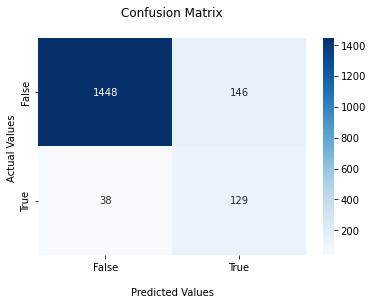

In [79]:
plot_conf_matr(model_cbc, features_test, target_test)

Вывод:
- Значение accuracy и roc-auc на тестовой выборке: 0.89 и 0.88
Из построенной матрицы ошибок можно сделать вывод:
- значение TrueNegative - 1448, т.е модель хорошо предсказывает пользователей, которые не уйдут.
- значение TruePositive - 129, т.е модель хорошо предсказывает пользователей, которые на самом деле не уйдут. Правильных ответов - 110 из 131.
- значение False Positive - 38, т.е модель не так сильно промахивается в предсказании пользователей, которые уйдут. Неправильных ответов - 38 из 131.
- значение FalseNegative - 146, т.е модель иногда предсказывает, что пользователи, которые не должны уйти, уйдут. Это не так страшно, ведь главная цель, как можно лучше определить пользоватлей, которые могут покинуть сервис.

### Важность признаков

In [80]:
def plot_features_importances(data):
    sns.barplot(x=data.sort_values(by=0).values.reshape((14,)),
                y=np.array(data.sort_values(by=0).index))

    plt.title('Feature importance')
    plt.ylabel('features')
    plt.xlabel('importance');

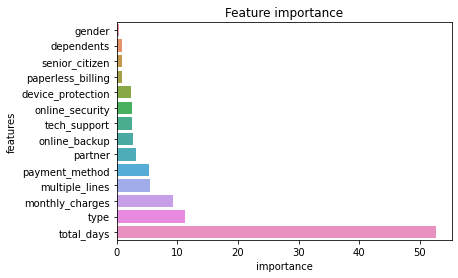

In [81]:
feature_importance_data = pd.DataFrame(model_cbc.feature_importances_,
                                       index=features_test.columns)

plot_features_importances(feature_importance_data)

Вывод:

Из графика видно, что кол-во дней, тип оплаты, ежемесячные траты

### Вывод

Обзор данных

- подключены все необходимые библиотеки
- успешно загружены данные
- получены общие данные о таблице
- все столбцы приведены к нижнему регистру
- изменены некорректные типы данных в столбцах
- выявлены неявные пропуски

Подготовка данных

- соединены таблицы
- добавлен целевой признак churn
- добавлен новый признак total_days
- удалены незначащие столбцы

Исследовательский анализ данных

- построены распределения категориальных и количественных признаков
- определены тенденции

Предобработка данныхх

- удалены пропуски и заполнены пропущенные значения
- проведено исследование признаков на мультиколлинеарность
- удалены сильно коррелирующие признаки
- выявлен диссбаланс классов

Подготовка данных к обучению

- разделены данные на обучающую и тестовую выборки в соотношении 3:1
- произведена кодировка данных с помщью OrdinalEncoder
- признаки приведены к одному масштабу

Обучение модели

Были обучены следующие модели:

Простые модели:

- DecisionTreeClassifier
- RandomForestClassifier
Модели на основе градиентного бустинга:

- CatBoostClassifier
Лучше всех себя показала модель CatBoostClassifier с метрикой roc-auc - 0.88

Анализ важности признаков

Выявлены самые значащие признаки:

- тип оплаты
- ежемесяячные траты на услуги по договру
- срок пользования услугами в днях

## Отчет по решению

Основные артефакты отчёта:
1. Ключевые шаги работы над проектом
- 1. Загрузка и изучение данных.
- 2. Подготовка данных
- 3. Исследовательский анализ данных.
- 4. Предобработка данных
- 5. Подготовка данных к обучению.
- 6. Обучение модели
- 7. Проверка модели
- 8. Анализ важности признаков

2. Анализ соответствия фактической работы запланированным шагам.
- Фактическая работа проведена и полнстью соответсвует запланированным шагам

3. Рефлексия над сложностями и описание путей их решения
- Пропуски в InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies и MultipleLines скорее всего означают, что услуги не подключены. Заменим пропуски на "NotUsed"
- В процессе были решены проблемы для предобработки данных. Были использованны заглушки
4. Итоговый список признаков (с расшифровкой) для обучения модели, способы их обработки (какк.одировали/стандартизировали/преобразовывали).
- 'type' - тип оплаты
- 'paperless_billing' - электронный чек
- 'payment_method' - метод оплаты
- 'monthly_charges'- сумма платежа в месяц
- 'churn' - признак оттока
- 'total_days' - кол-во дней пользования
- 'gender' - пол
- 'senior_citizen' - пенсионер 
- 'partner' - семейное положение
- 'dependents' - иждевенцы 
- 'online_security' - блокировка небезопасных сайтов
- 'online_backup' - облачное хранилище
- 'device_protection' - антивирус
- 'tech_support' - отдельна линия тех. поддержки
- 'multiple_lines' - паралелльные линии
5. Краткое описание предобработки данных (проблема - что делали).
- `BeginDate` – поле приведено к типу *datetime*
- `EndDate` – для значений \"No\" установлена \"заглушка\", соответствующая дате актуальности датасета - *2020-02-01*), после чего поле было приведено к формату *datetime*
- `MonthlyCharges` - поле приведено к целочисленному типу для экономии памяти (два знака после запятой - излишняя точность в значениях)
- `TotalCharges` - неявные пропуски (пустые значения) приведены в соответствие с полем суммарных трат, так как пропуски маркеруют клиентов, начавших пользоваться услагми компании в феврале 2020 года
6. Сводная таблица исследованных моделей и их метрика на кросс-валидации.
| Модель | ROC-AUC |
| :-----------| :----------- |
| LogisticRegression | 0.75 |
| DecisionTreeClassifier | 0.79 |
| RandomForestClassifier | 0.82 |
| CatBoostClassifier | 0.88 |
7. Лучшая модель - название, гиперпараметры, метрика на кросс-валидации.
| Модель | Гиперпараметры | Кросс-валидация |
| :-----------| :----------- | :----------- |
| CatBoostClassifier | {'depth': 5, 'learning_rate': 0.03} | 0.88 |
8. Итоговая метрика на test (AUC-ROC и Accuracy).
| Модель | ROC-AUC на тест | Accuracy |
| :-----------| :----------- | :----------- |
| CatBoostClassifier | 0.88 | 0.89 |
9. Матрица ошибок (таблица или график + интерпретация).
|  | False | True |
| :-----------| :----------- | :----------- |
| False | 1448 | 146 | |
| True  | 38 | 129 | |
- Значение accuracy и roc-auc на тестовой выборке: 0.89 и 0.88
Из построенной матрицы ошибок можно сделать вывод:
- значение TrueNegative - 1448, т.е модель хорошо предсказывает пользователей, которые не уйдут.
- значение TruePositive - 129, т.е модель хорошо предсказывает пользователей, которые на самом деле не уйдут. Правильных ответов - 110 из 131.
- значение False Positive - 38, т.е модель не так сильно промахивается в предсказании пользователей, которые уйдут. Неправильных ответов - 38 из 131.
- значение FalseNegative - 146, т.е модель иногда предсказывает, что пользователи, которые не должны уйти, уйдут. Это не так страшно, ведь главная цель, как можно лучше определить пользоватлей, которые могут покинуть сервис.
10. Важность признаков (график + комментарии).



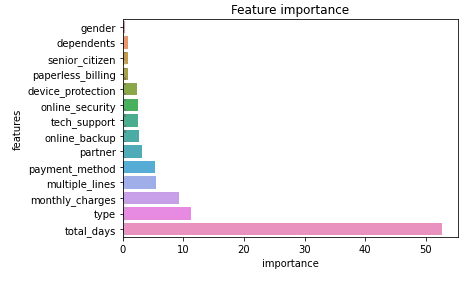

|Имя признака|Расшифровка|Важность для модели|
| :------------| :-----------| :----------------------|
|Totaldays|Длительность использования услуг компании| 53% |
|Type|Тип оплаты| 11% |
|MonthlyCharges|Плата за месяц| 9% |
|MultipleLines|Параллельные линии| 5% |
|PaymentMethod|Способ оплаты| 4.8% |